---

## Read the OSA data 

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)

# Assign spreadsheet filename to `file`
file = 'Info_BDApnea_QuironMalaga_rev1.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Hoja1', 'Hoja2']


In [2]:
df_tmp = xl.parse('Hoja1')

In [3]:
df_tmp

Patient                                        Comentarios Audios tumbado  \
0     P0001  es el Patient0002 (fotos) 3 (sentado) y 4 (tum...             si   
1     P0002          Es el Patient0006 (sentado) y 7 (tumbado)             si   
2     P0003                                  Patient 8, 9 y 10             si   
3     P0004                                    Patient 13 y 14     si_codigos   
4     P0005                       Patient0015 los códigos QMH5     si_codigos   
..      ...                                                ...            ...   
678   P0679                       QMH688(patient0753) usa CPAP      NO_UNAREP   
679   P0680                                QMH689(patient0754)      NO_UNAREP   
680   P0681                       QMH690(patient0755) usa CPAP      NO_UNAREP   
681   P0682                                QMH691(patient0756)      NO_UNAREP   
682   P0683  QMH692(patient0757) FOTOS BOCA y RESPIRACIONES...      NO_UNAREP   

    Fotos Audio fs KHz  Gender EPWORTH   IAH     IAH Supino      IAH Lateral  \
0      si           16  hombre     NaN  71.0             -1               -1   
1      si           16  hombre     NaN  29.6             -1               -1   
2      si           16  hombre     NaN  56.0             -1               -1   
3      si           16  hombre     NaN  19.7             -1               -1   
4      si           16  hombre     NaN   9.0             -1               -1   
..    ...          ...     ...     ...   ...            ...              ...   
678    si        55/16  hombre     NaN   9.2           15.9              7.3   
679    si        55/16  hombre     NaN  52.2           53.4             50.3   
680    si        55/16  hombre     NaN   NaN  NO disponible              NaN   
681    si        55/16   mujer     NaN   5.4            NaN  este sobre todo   
682    si        55/16   mujer     NaN  31.9            NaN              NaN   

      Peso  Talla  IMC  Edad  PerCervical  Fumador Roncador  \
0     82.0  168.0 -1.0  39.0         -1.0       ns       ns   
1    119.0  174.0 -1.0  56.0         48.0       si       ns   
2     -1.0   -1.0 -1.0  46.0         43.0       si       ns   
3     78.0  168.0 -1.0  39.0         42.0       no       ns   
4     80.0  173.0 -1.0  32.0         40.0       no       ns   
..     ...    ...  ...   ...          ...      ...      ...   
678  105.0  180.0 -1.0  35.0         45.0       no       si   
679   90.0  180.0 -1.0  50.0         42.0       no       si   
680   94.0  177.0 -1.0  44.0         44.0       no       si   
681   66.0  164.0 -1.0  57.0         35.0       si       si   
682   70.0  163.0 -1.0  60.0         35.0  antiguo       si   

                     Enfermedades Sala/Ruidos Imagen        Dialecto  \
0            Septo_Nasal_Desviado          nd     nd              nd   
1                              nd          nd     nd              nd   
2                              nd          nd     nd              nd   
3        Hiperactividad_bronquial          nd     nd              nd   
4    Septo_Nasal_Desviado_Operado          nd     nd              nd   
..                            ...         ...    ...             ...   
678                         Apnea         443     nd  andaluz/Málaga   
679                            no         442     nd          Mezcla   
680                         Apnea         434     nd  andaluz/Málaga   
681                         Lupus         436     nd  andaluz/Málaga   
682           Costipada en prueba         422     nd  andaluz/Málaga   

     DIST EXT OJOS DIST BARB-LOB Cansancio Concentrarse PerdRespNoche  HiperT  \
0              NaN           NaN       NaN          NaN           NaN     NaN   
1              NaN           NaN       NaN          NaN           NaN     NaN   
2              NaN           NaN       NaN          NaN           NaN     NaN   
3              NaN           NaN       NaN          NaN           NaN     NaN   
4              NaN           NaN       NaN 

### Generate a reporth with Pandas-Profiling

In [4]:
# Generate a report with pandas_profiling
report = df_tmp.profile_report(title='OSA_report')
report.to_file(output_file="OSA_report.html")

/home/jaime/.local/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:34: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))
/home/jaime/.local/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 0).')
  correlation_name=correlation_name, error=error
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. F

### Select columns to analyze 

In [5]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 28 columns):
Patient           683 non-null object
Comentarios       683 non-null object
Audios_tumbado    683 non-null object
Fotos             683 non-null object
Audio_fs_KHz      683 non-null object
Gender            683 non-null object
EPWORTH           55 non-null object
IAH               649 non-null float64
IAH_Supino        588 non-null object
IAH_Lateral       525 non-null object
Peso              676 non-null float64
Talla             677 non-null float64
IMC               678 non-null float64
Edad              678 non-null float64
PerCervical       678 non-null float64
Fumador           680 non-null object
Roncador          680 non-null object
Enfermedades      678 non-null object
Sala/Ruidos       680 non-null object
Imagen            680 non-null object
Dialecto          680 non-null object
DIST_EXT_OJOS     305 non-null float64
DIST_BARB-LOB     305 non-null object
Cansancio      

In [6]:
# MAYBE FUTURE: Roncador, DIST_BARB_LOB, DIST_EXT_OJOS, Enfermedades 
columns = ['Patient', 'Gender', 'IAH', 'Peso', 'Talla', 
           'Edad', 'Fumador', 'PerCervical']
df_tmp1 = pd.DataFrame(df_tmp, columns=columns)

In [7]:
df_tmp1

Patient  Gender   IAH   Peso  Talla  Edad  Fumador  PerCervical
0     P0001  hombre  71.0   82.0  168.0  39.0       ns         -1.0
1     P0002  hombre  29.6  119.0  174.0  56.0       si         48.0
2     P0003  hombre  56.0   -1.0   -1.0  46.0       si         43.0
3     P0004  hombre  19.7   78.0  168.0  39.0       no         42.0
4     P0005  hombre   9.0   80.0  173.0  32.0       no         40.0
..      ...     ...   ...    ...    ...   ...      ...          ...
678   P0679  hombre   9.2  105.0  180.0  35.0       no         45.0
679   P0680  hombre  52.2   90.0  180.0  50.0       no         42.0
680   P0681  hombre   NaN   94.0  177.0  44.0       no         44.0
681   P0682   mujer   5.4   66.0  164.0  57.0       si         35.0
682   P0683   mujer  31.9   70.0  163.0  60.0  antiguo         35.0

[683 rows x 8 columns]

### Look for NaN and -1 rows 

In [8]:
for column in df_tmp1.columns.values:
    print('\033[1m' + str(column) + '\033[0m')
    print("Number of NaN values:")
    print(df_tmp1[column].isnull().sum())
    print("Number of -1 values:")
    print(df_tmp1[df_tmp1[column]==-1].shape[0])
    print("")

Patient
Number of NaN values:
0
Number of -1 values:
0

Gender
Number of NaN values:
0
Number of -1 values:
0

IAH
Number of NaN values:
34
Number of -1 values:
0

Peso
Number of NaN values:
7
Number of -1 values:
1

Talla
Number of NaN values:
6
Number of -1 values:
1

Edad
Number of NaN values:
5
Number of -1 values:
3

Fumador
Number of NaN values:
3
Number of -1 values:
0

PerCervical
Number of NaN values:
5
Number of -1 values:
7



In [9]:
df_tmp1 = df_tmp1.replace(-1, np.nan)

In [10]:
df_tmp1 = df_tmp1.rename(columns = {"Talla": "Height", 
                                "Peso":"Weight", 
                                "Edad": "Age",
                                "IAH": "AHI",
                                "Fumador": "Smoker",
                                "PerCervical": "Cervical"})

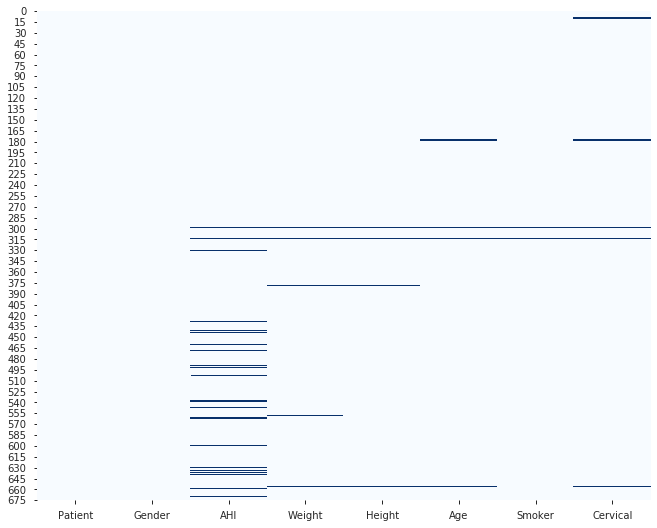

In [11]:
plt.figure(figsize=(11,9))
sns.heatmap(df_tmp1.isnull(),cmap='Blues',cbar=False)

## Label encoding 'Fumador'
    0 -> no fumador
    1 -> antiguo fumador
    2 -> poco fumador
    3 -> sí fumador

In [12]:
df_tmp1['Smoker'].value_counts(dropna=False)

no           373
si           165
antiguo      119
ns            16
poco           6
NaN            3
si (poco)      1
Name: Smoker, dtype: int64

In [13]:
df_tmp1 = df_tmp1.replace('ns', np.nan)
df_tmp1 = df_tmp1.replace('si (poco)', 'poco')

In [14]:
df_tmp1['Smoker'].value_counts(dropna=False)

no         373
si         165
antiguo    119
NaN         19
poco         7
Name: Smoker, dtype: int64

In [15]:
df_tmp1['Smoker'] = df_tmp1['Smoker'].astype('category')
df_tmp1['Smoker'] = df_tmp1['Smoker'].cat.codes

In [16]:
df_tmp1['Smoker'] = df_tmp1['Smoker'].replace(1.0, 4.0)
df_tmp1['Smoker'] = df_tmp1['Smoker'].replace(0.0, 1.0)
df_tmp1['Smoker'] = df_tmp1['Smoker'].replace(4.0, 0.0)

In [17]:
df_tmp1['Smoker'] = df_tmp1['Smoker'].replace(-1, np.nan)
df_tmp1['Smoker'].value_counts(dropna=False)

0.0    373
3.0    165
1.0    119
NaN     19
2.0      7
Name: Smoker, dtype: int64

## One hot enconding 'Gender'

In [18]:
df_tmp1 = pd.concat([df_tmp1,pd.get_dummies(df_tmp1['Gender'])],axis=1)
df_tmp1 = df_tmp1.drop(['Gender'],axis=1)

In [19]:
df_tmp1.head(5)

Patient   AHI  Weight  Height   Age  Smoker  Cervical  hombre  mujer
0   P0001  71.0    82.0   168.0  39.0     NaN       NaN       1      0
1   P0002  29.6   119.0   174.0  56.0     3.0      48.0       1      0
2   P0003  56.0     NaN     NaN  46.0     3.0      43.0       1      0
3   P0004  19.7    78.0   168.0  39.0     0.0      42.0       1      0
4   P0005   9.0    80.0   173.0  32.0     0.0      40.0       1      0

### Replacing repeated value in 'Patient' for further indexing

In [20]:
df_tmp1['Patient'].value_counts()

P0363    2
P0090    1
P0220    1
P0449    1
P0468    1
        ..
P0240    1
P0408    1
P0125    1
P0557    1
P0274    1
Name: Patient, Length: 682, dtype: int64

In [21]:
df_tmp1[df_tmp1['Patient']=='P0363']

Patient   AHI  Weight  Height   Age  Smoker  Cervical  hombre  mujer
362   P0363  21.4    70.0   160.0  42.0     0.0      34.0       0      1
365   P0363  16.9    89.0   167.0  63.0     0.0      39.0       0      1

In [22]:
df_tmp1.iloc[362] = df_tmp1.iloc[362].replace('P0363','P9999')

In [23]:
df_tmp1.iloc[362]

Patient     P9999
AHI          21.4
Weight         70
Height        160
Age            42
Smoker          0
Cervical       34
hombre          0
mujer           1
Name: 362, dtype: object

In [24]:
df_tmp1['Patient'].value_counts()

P0090    1
P0220    1
P0147    1
P0449    1
P0468    1
        ..
P0416    1
P0155    1
P0240    1
P0408    1
P0274    1
Name: Patient, Length: 683, dtype: int64

### Drop out all rows with NAN or -1

In [25]:
df_final = df_tmp1.dropna()

In [26]:
df_final = df_final.rename(columns = {"hombre": "Gender==Man",
                                "mujer": "Gender==Woman"})

In [27]:
df_final = df_final.reset_index()
df_final = df_final.drop(['index'],axis=1)
df_final

Patient   AHI  Weight  Height   Age  Smoker  Cervical  Gender==Man  \
0     P0002  29.6   119.0   174.0  56.0     3.0      48.0            1   
1     P0004  19.7    78.0   168.0  39.0     0.0      42.0            1   
2     P0005   9.0    80.0   173.0  32.0     0.0      40.0            1   
3     P0006   2.0   109.0   190.0  32.0     0.0      42.0            1   
4     P0007  34.0    86.0   169.0  39.0     0.0      42.0            1   
..      ...   ...     ...     ...   ...     ...       ...          ...   
620   P0677  36.3    82.0   165.0  64.0     1.0      39.0            0   
621   P0679   9.2   105.0   180.0  35.0     0.0      45.0            1   
622   P0680  52.2    90.0   180.0  50.0     0.0      42.0            1   
623   P0682   5.4    66.0   164.0  57.0     3.0      35.0            0   
624   P0683  31.9    70.0   163.0  60.0     1.0      35.0            0   

     Gender==Woman  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
620              1  
621              0  
622              0  
623              1  
624              1  

[625 rows x 9 columns]

### Adding BMI and log(AHI+1)

In [28]:
df_final['BMI'] = df_final['Weight']/((df_final['Height']/100)**2)
#np_AHI = df_final['AHI'].to_numpy()
#df_final['log_AHI'] = df_final['AHI'].apply(lambda row: np.log10(row+1))
#df_final = df_final.drop(['AHI'],axis=1)
df_final

Patient   AHI  Weight  Height   Age  Smoker  Cervical  Gender==Man  \
0     P0002  29.6   119.0   174.0  56.0     3.0      48.0            1   
1     P0004  19.7    78.0   168.0  39.0     0.0      42.0            1   
2     P0005   9.0    80.0   173.0  32.0     0.0      40.0            1   
3     P0006   2.0   109.0   190.0  32.0     0.0      42.0            1   
4     P0007  34.0    86.0   169.0  39.0     0.0      42.0            1   
..      ...   ...     ...     ...   ...     ...       ...          ...   
620   P0677  36.3    82.0   165.0  64.0     1.0      39.0            0   
621   P0679   9.2   105.0   180.0  35.0     0.0      45.0            1   
622   P0680  52.2    90.0   180.0  50.0     0.0      42.0            1   
623   P0682   5.4    66.0   164.0  57.0     3.0      35.0            0   
624   P0683  31.9    70.0   163.0  60.0     1.0      35.0            0   

     Gender==Woman        BMI  
0                0  39.305060  
1                0  27.636054  
2                0  26.729927  
3                0  30.193906  
4                0  30.110991  
..             ...        ...  
620              1  30.119376  
621              0  32.407407  
622              0  27.777778  
623              1  24.538965  
624              1  26.346494  

[625 rows x 10 columns]

In [29]:
df_final.describe()

AHI      Weight     Height         Age      Smoker   Cervical  \
count  625.000000  625.000000  625.00000  625.000000  625.000000  625.00000   
mean    20.379296   87.692800  171.36800   49.443200    0.942400   40.62800   
std     18.642982   18.271941    9.49809   12.362723    1.248028    3.97705   
min      0.000000   48.000000  144.00000   20.000000    0.000000   30.00000   
25%      6.300000   75.000000  165.00000   40.000000    0.000000   38.00000   
50%     14.400000   86.000000  171.00000   49.000000    0.000000   41.00000   
75%     30.000000   98.000000  178.00000   59.000000    2.000000   43.00000   
max    108.600000  165.000000  197.00000   88.000000    3.000000   53.00000   

       Gender==Man  Gender==Woman         BMI  
count   625.000000     625.000000  625.000000  
mean      0.720000       0.280000   29.820124  
std       0.449359       0.449359    5.578711  
min       0.000000       0.000000   18.289895  
25%       0.000000       0.000000   26.037494  
50%       1.000000       0.000000   28.731747  
75%       1.000000       1.000000   32.653061  
max       1.000000       1.000000   63.654952

### Generate a report with Pandas-Profiling

In [30]:
# Generate a report with pandas_profiling
report_final = df_final.profile_report(title='OSA_report_final_BMI')
report_final.to_file(output_file="OSA_report_final_BMI.html")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


## Write to an Excel file

In [31]:
df_final.to_excel (r'OSA_DB_jaime.xlsx', index = None, header=True) 

In [32]:
# We will use OSA_df name

OSA_df = df_final

In [33]:
OSA_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 10 columns):
Patient          625 non-null object
AHI              625 non-null float64
Weight           625 non-null float64
Height           625 non-null float64
Age              625 non-null float64
Smoker           625 non-null float64
Cervical         625 non-null float64
Gender==Man      625 non-null uint8
Gender==Woman    625 non-null uint8
BMI              625 non-null float64
dtypes: float64(7), object(1), uint8(2)
memory usage: 40.4+ KB


In [34]:
OSA_df.iloc[0:4,]

Patient   AHI  Weight  Height   Age  Smoker  Cervical  Gender==Man  \
0   P0002  29.6   119.0   174.0  56.0     3.0      48.0            1   
1   P0004  19.7    78.0   168.0  39.0     0.0      42.0            1   
2   P0005   9.0    80.0   173.0  32.0     0.0      40.0            1   
3   P0006   2.0   109.0   190.0  32.0     0.0      42.0            1   

   Gender==Woman        BMI  
0              0  39.305060  
1              0  27.636054  
2              0  26.729927  
3              0  30.193906

### Setting 'Patient' as index

In [35]:
OSA_df.set_index("Patient", inplace=True)

In [36]:
OSA_df.index

Index(['P0002', 'P0004', 'P0005', 'P0006', 'P0007', 'P0008', 'P0009', 'P0010',
       'P0014', 'P0015',
       ...
       'P0672', 'P0673', 'P0674', 'P0675', 'P0676', 'P0677', 'P0679', 'P0680',
       'P0682', 'P0683'],
      dtype='object', name='Patient', length=625)

In [37]:
OSA_df.loc[['P0002','P0006']]

AHI  Weight  Height   Age  Smoker  Cervical  Gender==Man  \
Patient                                                              
P0002    29.6   119.0   174.0  56.0     3.0      48.0            1   
P0006     2.0   109.0   190.0  32.0     0.0      42.0            1   

         Gender==Woman        BMI  
Patient                            
P0002                0  39.305060  
P0006                0  30.193906

## Exploratory Data Analysis

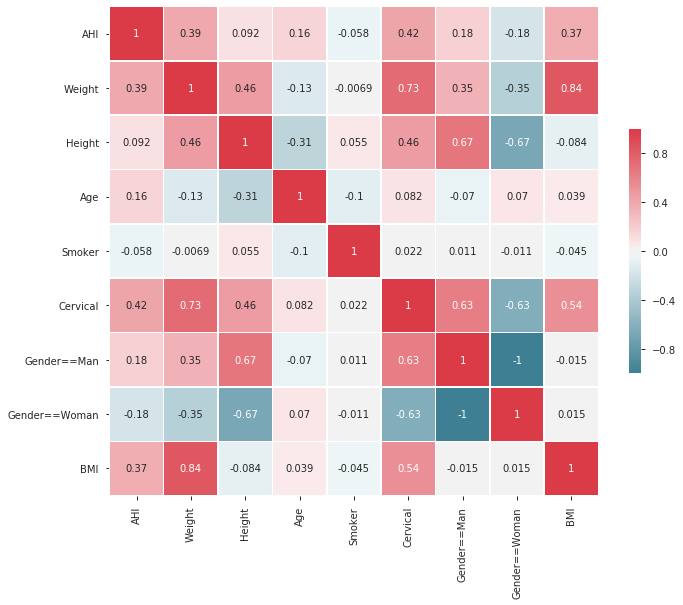

In [38]:
corr = OSA_df.corr()
f, ax = plt.subplots(figsize = (11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm = sns.heatmap(corr,cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Text(0, 0.5, 'Count')

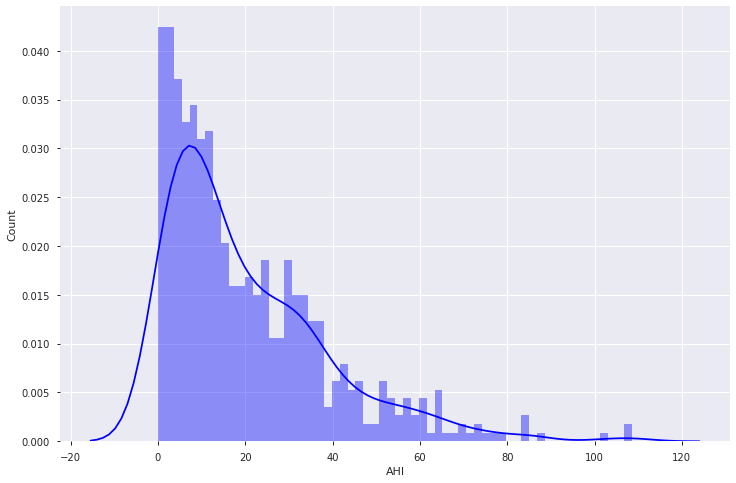

In [39]:
# Histogram + KDE of AHI
plt.figure(figsize = (12, 8))
ax = sns.distplot(OSA_df['AHI'], hist=True, color='b', bins=60)
plt.xlabel('AHI') 
plt.ylabel('Count') 

<Figure size 864x576 with 0 Axes>

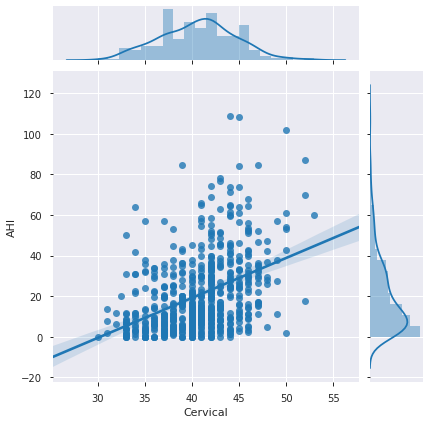

In [40]:
plt.figure(figsize = (12, 8))
sns.jointplot(OSA_df['Cervical'],OSA_df['AHI'],kind='reg')

<Figure size 864x576 with 0 Axes>

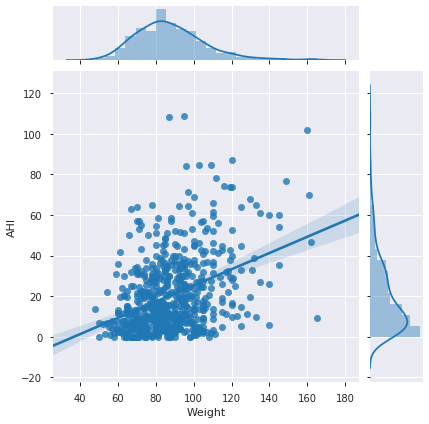

In [41]:
plt.figure(figsize = (12, 8))
sns.jointplot(OSA_df['Weight'],OSA_df['AHI'],kind='reg')

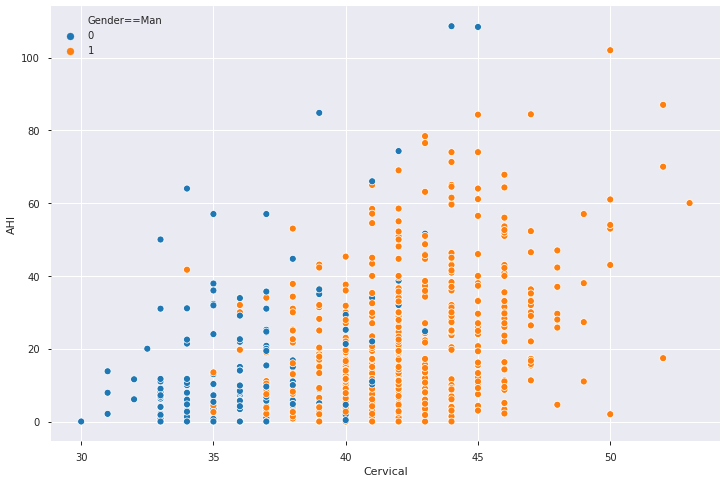

In [42]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data=OSA_df, x='Cervical',y='AHI', hue='Gender==Man')

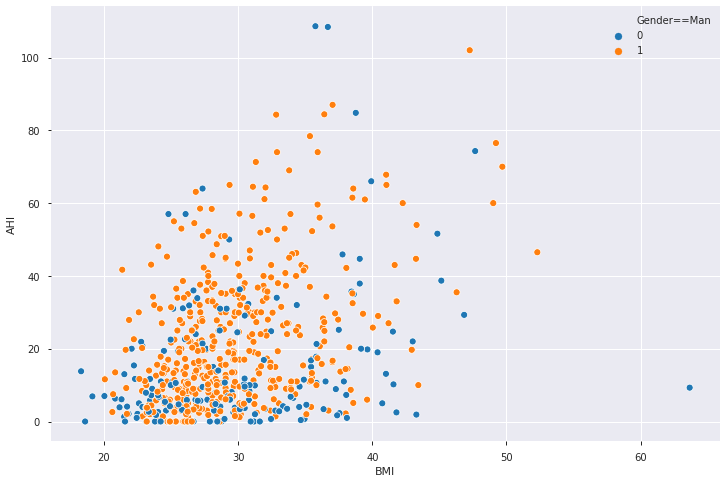

In [43]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data=OSA_df, x='BMI',y='AHI', hue='Gender==Man')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


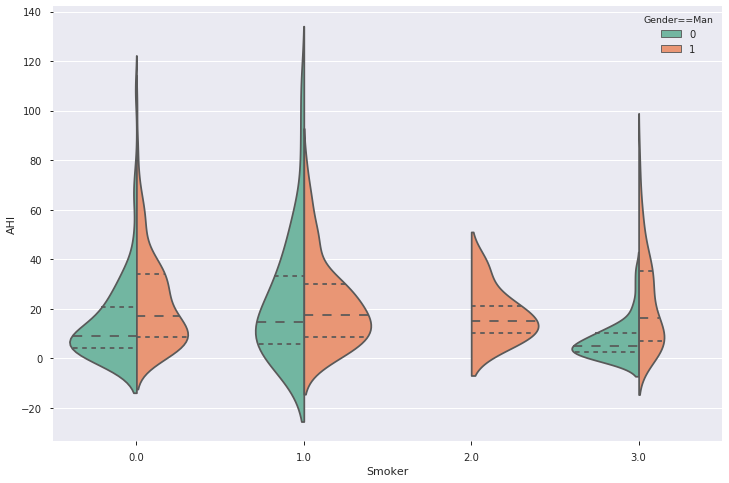

In [44]:
plt.figure(figsize = (12, 8))
sns.violinplot(x=OSA_df['Smoker'], y=OSA_df['AHI'], hue=OSA_df['Gender==Man'], 
               split=True, inner="quart", palette="Set2")

    0 -> no fumador
    1 -> antiguo fumador
    2 -> poco fumador
    3 -> sí fumador

<Figure size 864x576 with 0 Axes>

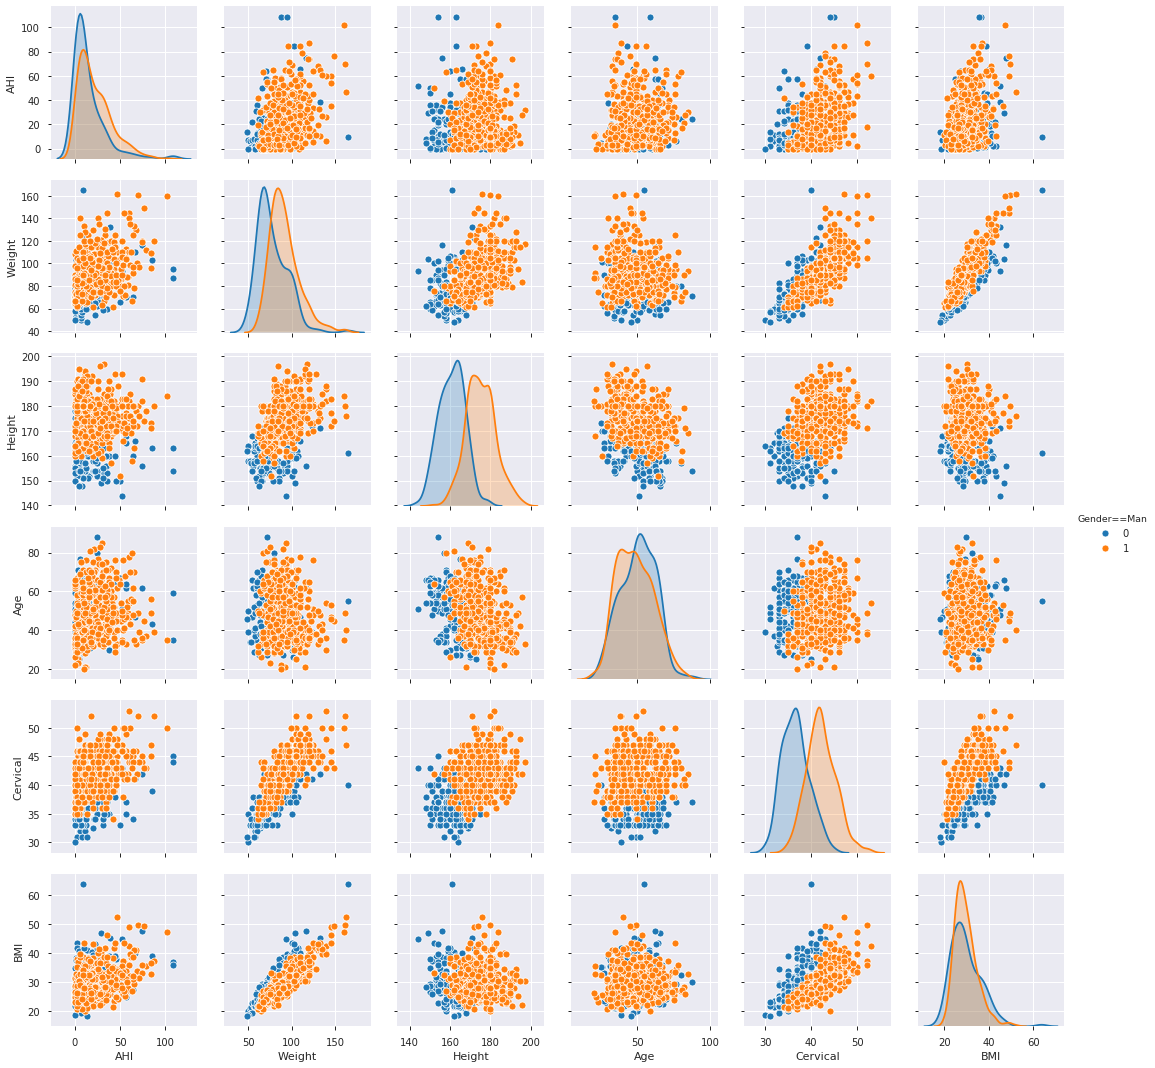

In [45]:
plt.figure(figsize = (12, 8))
sns.pairplot(OSA_df, vars=['AHI', 'Weight', 'Height', 'Age', 'Cervical', 'BMI'], hue='Gender==Man')

<Figure size 864x576 with 0 Axes>

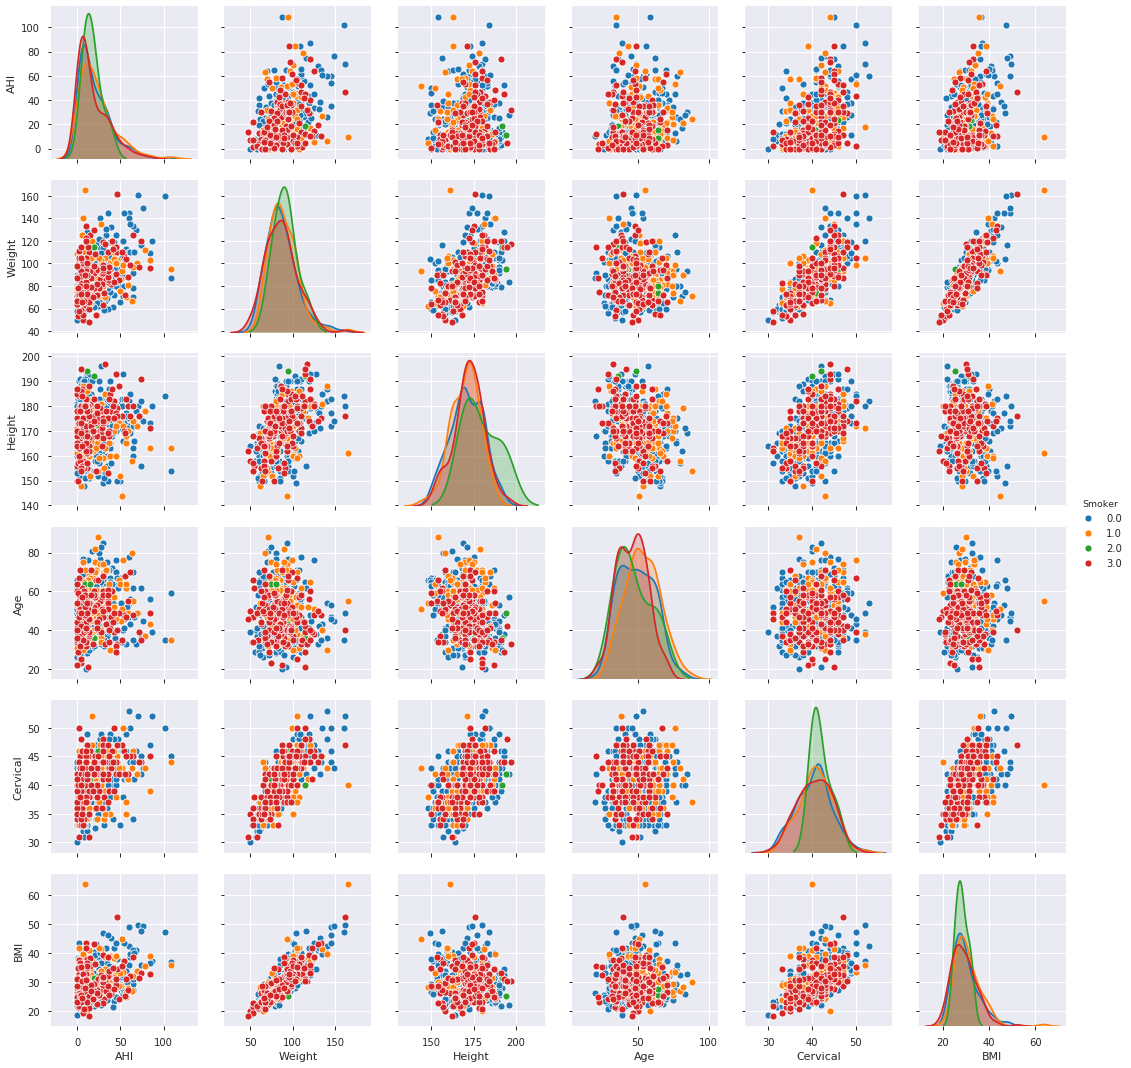

In [46]:
plt.figure(figsize = (12, 8))
sns.pairplot(OSA_df, vars=['AHI', 'Weight', 'Height', 'Age', 'Cervical', 'BMI'], hue='Smoker')

In [47]:
OSA_df

AHI  Weight  Height   Age  Smoker  Cervical  Gender==Man  \
Patient                                                              
P0002    29.6   119.0   174.0  56.0     3.0      48.0            1   
P0004    19.7    78.0   168.0  39.0     0.0      42.0            1   
P0005     9.0    80.0   173.0  32.0     0.0      40.0            1   
P0006     2.0   109.0   190.0  32.0     0.0      42.0            1   
P0007    34.0    86.0   169.0  39.0     0.0      42.0            1   
...       ...     ...     ...   ...     ...       ...          ...   
P0677    36.3    82.0   165.0  64.0     1.0      39.0            0   
P0679     9.2   105.0   180.0  35.0     0.0      45.0            1   
P0680    52.2    90.0   180.0  50.0     0.0      42.0            1   
P0682     5.4    66.0   164.0  57.0     3.0      35.0            0   
P0683    31.9    70.0   163.0  60.0     1.0      35.0            0   

         Gender==Woman        BMI  
Patient                            
P0002                0  39.305060  
P0004                0  27.636054  
P0005                0  26.729927  
P0006                0  30.193906  
P0007                0  30.110991  
...                ...        ...  
P0677                1  30.119376  
P0679                0  32.407407  
P0680                0  27.777778  
P0682                1  24.538965  
P0683                1  26.346494  

[625 rows x 9 columns]

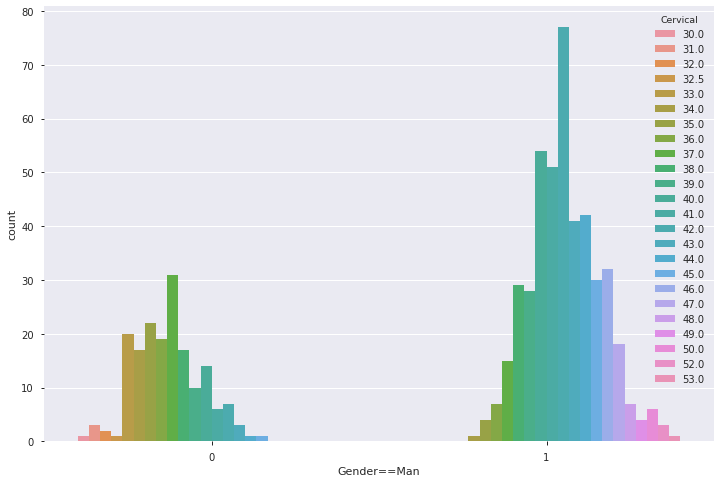

In [48]:
plt.figure(figsize = (12, 8))
sns.countplot(x=OSA_df['Gender==Man'], hue=OSA_df['Cervical'])

Text(0, 0.5, 'Cervical')

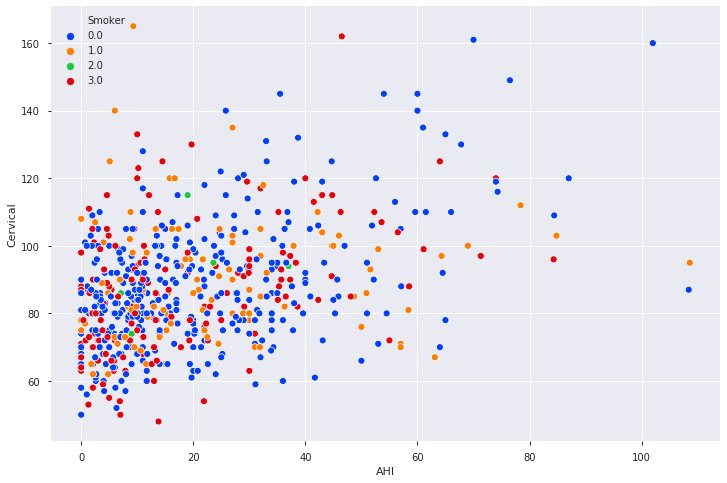

In [49]:
# Relationship between AHI and Weight
plt.figure(figsize = (12, 8))
palette = sns.color_palette("bright", 4)
sns.scatterplot(OSA_df['AHI'],OSA_df['Weight'], hue=OSA_df['Smoker'], palette=palette)
plt.xlabel('AHI') 
plt.ylabel('Cervical')

Text(336.9714285714286, 0.5, 'Weight')

<Figure size 864x576 with 0 Axes>

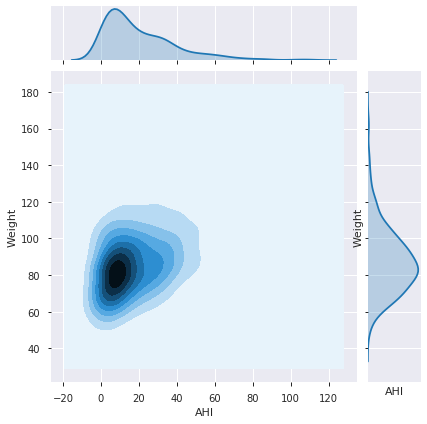

In [50]:
plt.figure(figsize = (12, 8))
sns.jointplot(OSA_df['AHI'],OSA_df['Weight'], kind='kde')
plt.xlabel('AHI') 
plt.ylabel('Weight')

<font size= 5>----------------------------------------------------------------</font>
<font size= 5>----------------------------------------------------------------

## ML models using ScikitLearn

</font>



## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

In [51]:
### Picking predictor columns

# Get all the columns from the dataframe.
columns = OSA_df.columns.tolist()

# Filter the columns to remove ones we don't want.
features = [c for c in columns if c not in ["AHI"]]

# Store the variable we'll be predicting on.
target = "AHI"

print('Predictors: ',features)
print('')
print('Target: ',target)

Predictors:  ['Weight', 'Height', 'Age', 'Smoker', 'Cervical', 'Gender==Man', 'Gender==Woman', 'BMI']

Target:  AHI


In [52]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

X = OSA_df.loc[:, features]
y = OSA_df.loc[:, target]
y_reshaped = np.reshape(y.values, (y.shape[0], 1))

# Polynomial features
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

# StandardScaler
sc_std_X = StandardScaler()
sc_std_y = StandardScaler()
X_std_sc = sc_std_X.fit_transform(X)
y_std_sc = sc_std_y.fit_transform(y_reshaped)
y_std_sc = np.reshape(y_std_sc, (y_std_sc.shape[0],))

# MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_sc = sc_X.fit_transform(X)
y_sc = sc_y.fit_transform(y_reshaped)
y_sc = np.reshape(y_sc, (y_sc.shape[0],))

# Print the shapes of both sets.
print('X: ' + str(X.shape))
print('y: ' + str(y.shape))
print('Polynomial features X: ' + str(X_poly.shape))
print('StandardScaler X: ' + str(X_std_sc.shape))
print('StandardScaler y: ' + str(y_std_sc.shape))
print('MinMaxScaler X: ' + str(X_sc.shape))
print('MinMaxScaler y: ' + str(y_sc.shape))

X: (625, 8)
y: (625,)
Polynomial features X: (625, 45)
StandardScaler X: (625, 8)
StandardScaler y: (625,)
MinMaxScaler X: (625, 8)
MinMaxScaler y: (625,)


## Models:

In [53]:
### Selecting the model

from sklearn import linear_model, discriminant_analysis, kernel_ridge
from sklearn import svm, neighbors, gaussian_process, cross_decomposition
from sklearn import tree, ensemble, neural_network, isotonic
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
import xgboost
import catboost

kernel = DotProduct() + WhiteKernel()

model_list = {"Linear_Regression": linear_model.LinearRegression(),
              "Ridge_Regression": linear_model.Ridge(alpha = 0.5),
              "Lasso": linear_model.Lasso(alpha=0.1),
              "ElasticNet": linear_model.ElasticNet(random_state=42),
              "LARS": linear_model.Lars(n_nonzero_coefs=1),
              "Lasso_LARS": linear_model.LassoLars(alpha=0.01, max_iter=5),
              "Orthogonal_Matching_Pursuit": linear_model.OrthogonalMatchingPursuit(),
              "Bayesian_Ridge": linear_model.ARDRegression(),
              "Bayesian_ARD_Regression": linear_model.ARDRegression(),
              "Passive_Aggressive_Regressor": linear_model.PassiveAggressiveRegressor(),
              "RANSAC_Regressor": linear_model.RANSACRegressor(),
              "Theil_Sen_Regressor": linear_model.TheilSenRegressor(random_state=42),
              "Huber_Regressor": linear_model.HuberRegressor(),
              #"Linear_Discriminant_Analysis": discriminant_analysis.LinearDiscriminantAnalysis(),
              "Kernel_Rigde_Regressor": kernel_ridge.KernelRidge(alpha=1.0),
              "Linear_SVR": svm.LinearSVR(random_state=42, max_iter=500000),
              "Epsilon_SVR": svm.SVR(gamma='auto', C=1.0, epsilon=0.2),
              "Nu_SVR": svm.NuSVR(gamma='auto'),
              #"SGD_Regression": linear_model.SGDRegressor(),
              "K-neighbors_Regressor": neighbors.KNeighborsRegressor(n_neighbors=5),
              "K-neighbors_Radius_Neighbor_Regressor": neighbors.RadiusNeighborsRegressor(radius=28.0),
              "Gaussian_Process_Regressor": gaussian_process.GaussianProcessRegressor(kernel=kernel,random_state=42),
              #"PLS_Regressor": cross_decomposition.PLSRegression(n_components=5),
              "Decision_Tree_Regressor": tree.DecisionTreeRegressor(random_state=42),
              "GradientBoostingRegressor": ensemble.GradientBoostingRegressor(random_state=42),
              #"HistGradientBoostingRegressor": ensemble.HistGradientBoostingRegressor(),
              "Bagging_Regressor": ensemble.BaggingRegressor(),
              "Random_Forest_Regressor": ensemble.RandomForestRegressor(random_state=42, n_estimators=100),
              "ExtraTree_Regressor": tree.ExtraTreeRegressor(random_state=42),
              "AdaBoost_Regressor": ensemble.AdaBoostRegressor(random_state=42, n_estimators=100),
              "MLP_Regressor": neural_network.MLPRegressor(max_iter=400, early_stopping=True),
              #"Isotonic_Regressor": isotonic.IsotonicRegression()
              "XGBoost_Regressor": xgboost.XGBRegressor(objective='reg:squarederror'),
              "CatBoost_Regressor": catboost.CatBoostRegressor(verbose=False)
             }

## Results 1:

Linear_Regression
Variance score R²: 0.204
Max Error: 85.64
Mean Absolute Error ± STD: 12.55 ± 16.62
Mean Squared Error: 276.37
Root Mean Squared Error: 16.62



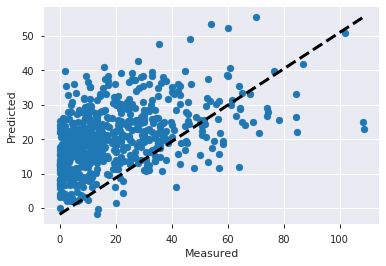

Ridge_Regression
Variance score R²: 0.204
Max Error: 85.63
Mean Absolute Error ± STD: 12.55 ± 16.62
Mean Squared Error: 276.36
Root Mean Squared Error: 16.62



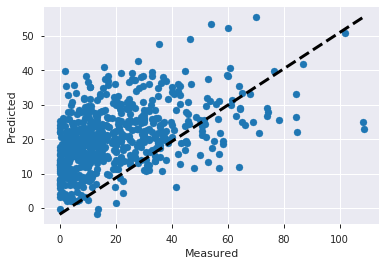

Lasso
Variance score R²: 0.205
Max Error: 84.47
Mean Absolute Error ± STD: 12.55 ± 16.61
Mean Squared Error: 275.95
Root Mean Squared Error: 16.61



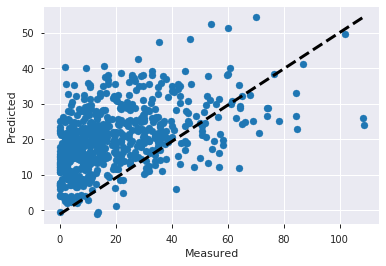

ElasticNet
Variance score R²: 0.203
Max Error: 84.44
Mean Absolute Error ± STD: 12.56 ± 16.63
Mean Squared Error: 276.47
Root Mean Squared Error: 16.63



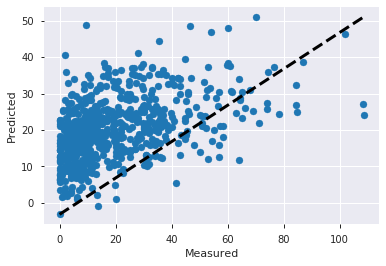

LARS
Variance score R²: 0.056
Max Error: 87.71
Mean Absolute Error ± STD: 14.04 ± 18.10
Mean Squared Error: 327.46
Root Mean Squared Error: 18.10



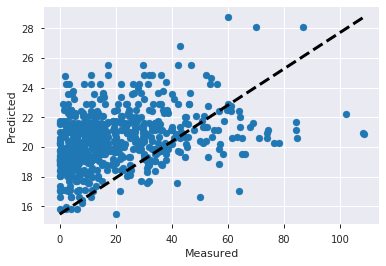

Lasso_LARS
Variance score R²: 0.197
Max Error: 83.94
Mean Absolute Error ± STD: 12.63 ± 16.69
Mean Squared Error: 278.56
Root Mean Squared Error: 16.69



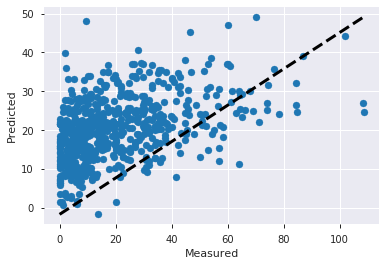

Orthogonal_Matching_Pursuit
Variance score R²: 0.158
Max Error: 82.17
Mean Absolute Error ± STD: 12.90 ± 17.09
Mean Squared Error: 292.07
Root Mean Squared Error: 17.09



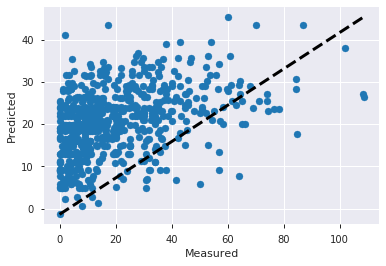

Bayesian_Ridge
Variance score R²: 0.198
Max Error: 84.18
Mean Absolute Error ± STD: 12.59 ± 16.69
Mean Squared Error: 278.46
Root Mean Squared Error: 16.69



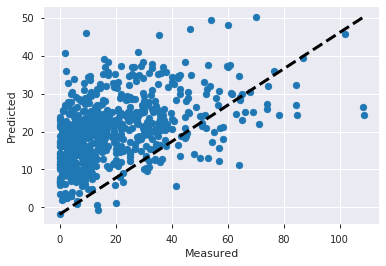

Bayesian_ARD_Regression
Variance score R²: 0.198
Max Error: 84.18
Mean Absolute Error ± STD: 12.59 ± 16.69
Mean Squared Error: 278.46
Root Mean Squared Error: 16.69



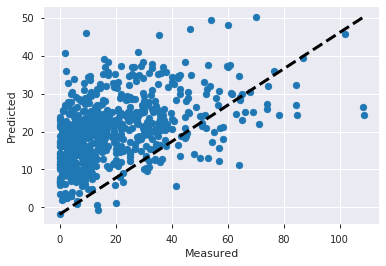

Passive_Aggressive_Regressor
Variance score R²: -0.196
Max Error: 89.22
Mean Absolute Error ± STD: 15.18 ± 18.99
Mean Squared Error: 415.11
Root Mean Squared Error: 20.37



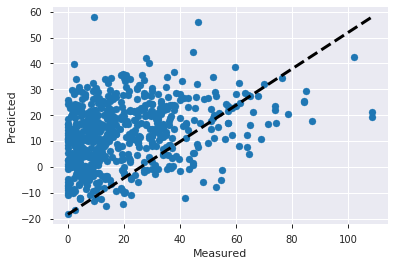

RANSAC_Regressor
Variance score R²: -0.079
Max Error: 84.01
Mean Absolute Error ± STD: 13.33 ± 17.87
Mean Squared Error: 374.28
Root Mean Squared Error: 19.35



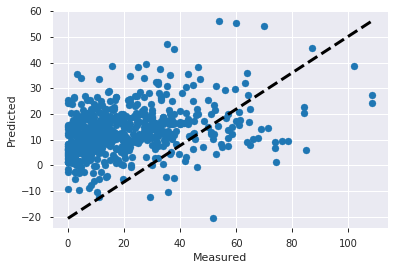

Theil_Sen_Regressor
Variance score R²: 0.157
Max Error: 96.60
Mean Absolute Error ± STD: 12.39 ± 16.95
Mean Squared Error: 292.38
Root Mean Squared Error: 17.10



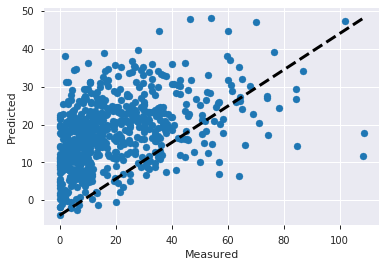

Huber_Regressor
Variance score R²: 0.170
Max Error: 89.21
Mean Absolute Error ± STD: 12.21 ± 16.74
Mean Squared Error: 287.89
Root Mean Squared Error: 16.97



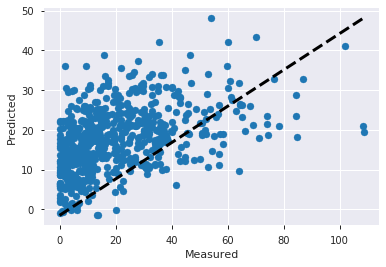

Kernel_Rigde_Regressor
Variance score R²: 0.202
Max Error: 84.68
Mean Absolute Error ± STD: 12.56 ± 16.64
Mean Squared Error: 276.79
Root Mean Squared Error: 16.64



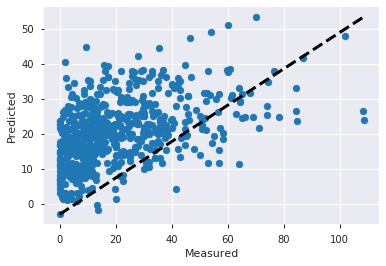

Linear_SVR
Variance score R²: 0.148
Max Error: 92.10
Mean Absolute Error ± STD: 12.15 ± 16.77
Mean Squared Error: 295.61
Root Mean Squared Error: 17.19



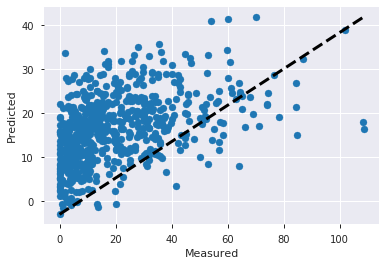

Epsilon_SVR
Variance score R²: -0.103
Max Error: 94.48
Mean Absolute Error ± STD: 13.87 ± 18.64
Mean Squared Error: 382.62
Root Mean Squared Error: 19.56



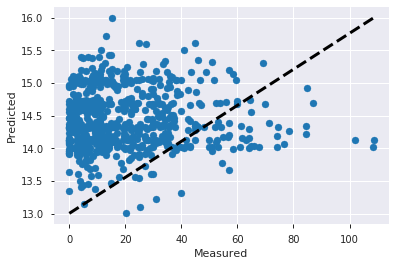

Nu_SVR
Variance score R²: -0.014
Max Error: 90.57
Mean Absolute Error ± STD: 14.16 ± 18.64
Mean Squared Error: 351.99
Root Mean Squared Error: 18.76



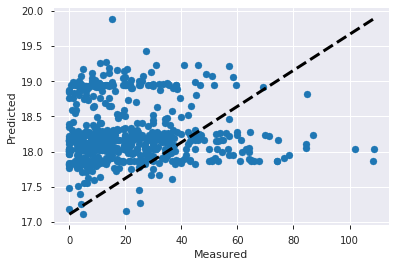

K-neighbors_Regressor
Variance score R²: 0.067
Max Error: 96.80
Mean Absolute Error ± STD: 13.32 ± 17.99
Mean Squared Error: 323.82
Root Mean Squared Error: 18.00



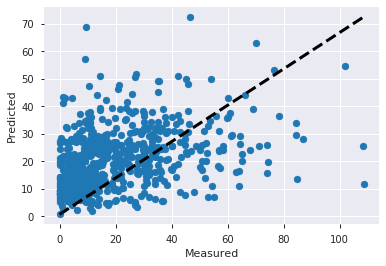

K-neighbors_Radius_Neighbor_Regressor
Variance score R²: 0.142
Max Error: 88.14
Mean Absolute Error ± STD: 13.27 ± 17.26
Mean Squared Error: 297.77
Root Mean Squared Error: 17.26



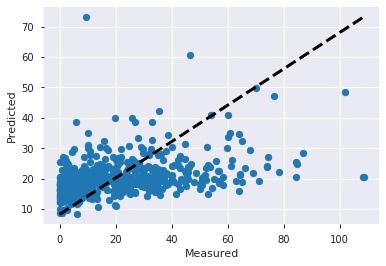

Gaussian_Process_Regressor
Variance score R²: 0.207
Max Error: 84.62
Mean Absolute Error ± STD: 12.53 ± 16.59
Mean Squared Error: 275.26
Root Mean Squared Error: 16.59



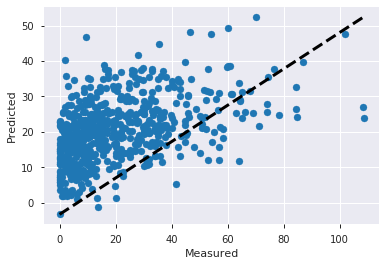

Decision_Tree_Regressor
Variance score R²: -0.392
Max Error: 91.20
Mean Absolute Error ± STD: 16.34 ± 21.98
Mean Squared Error: 482.92
Root Mean Squared Error: 21.98



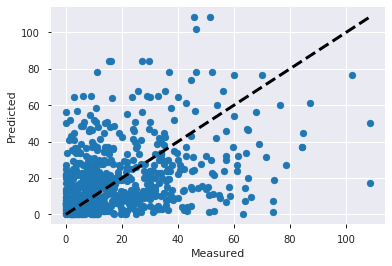

GradientBoostingRegressor
Variance score R²: 0.174
Max Error: 66.27
Mean Absolute Error ± STD: 12.74 ± 16.93
Mean Squared Error: 286.47
Root Mean Squared Error: 16.93



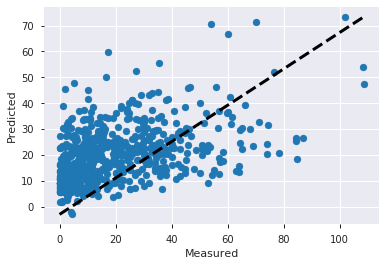

Bagging_Regressor
Variance score R²: 0.116
Max Error: 79.76
Mean Absolute Error ± STD: 12.94 ± 17.50
Mean Squared Error: 306.73
Root Mean Squared Error: 17.51



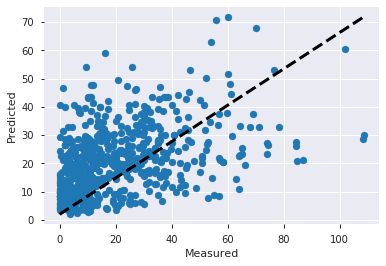

Random_Forest_Regressor
Variance score R²: 0.176
Max Error: 85.71
Mean Absolute Error ± STD: 12.65 ± 16.89
Mean Squared Error: 285.90
Root Mean Squared Error: 16.91



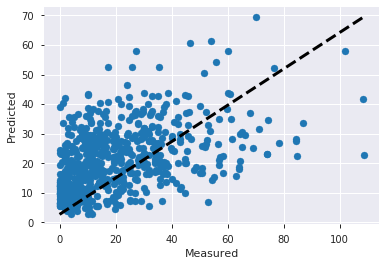

ExtraTree_Regressor
Variance score R²: -0.456
Max Error: 101.90
Mean Absolute Error ± STD: 16.48 ± 22.48
Mean Squared Error: 505.38
Root Mean Squared Error: 22.48



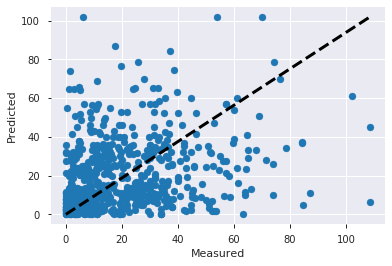

AdaBoost_Regressor
Variance score R²: -0.028
Max Error: 82.33
Mean Absolute Error ± STD: 15.68 ± 17.28
Mean Squared Error: 356.82
Root Mean Squared Error: 18.89



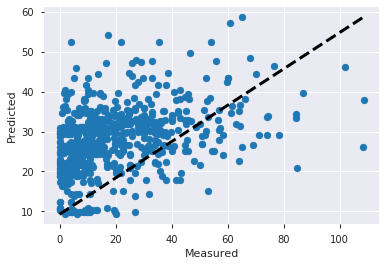

MLP_Regressor
Variance score R²: 0.141
Max Error: 86.92
Mean Absolute Error ± STD: 13.14 ± 17.26
Mean Squared Error: 298.24
Root Mean Squared Error: 17.27



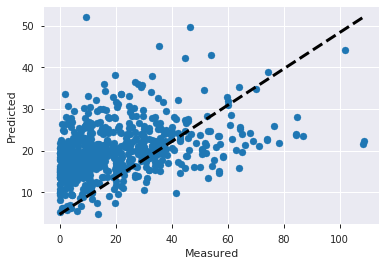

XGBoost_Regressor
Variance score R²: 0.147
Max Error: 90.46
Mean Absolute Error ± STD: 12.71 ± 17.21
Mean Squared Error: 296.11
Root Mean Squared Error: 17.21



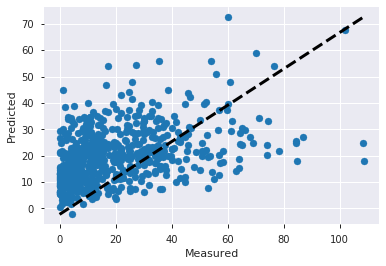

CatBoost_Regressor
Variance score R²: 0.121
Max Error: 82.05
Mean Absolute Error ± STD: 12.93 ± 17.46
Mean Squared Error: 304.87
Root Mean Squared Error: 17.46



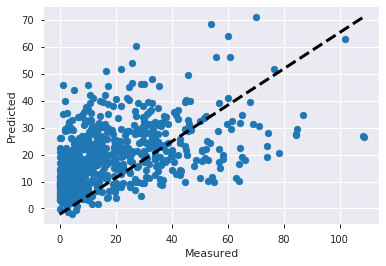

In [54]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error

for i in model_list:
    y_pred = cross_val_predict(model_list[i], X, y, cv=5)
    errors = y - y_pred
    #y_pred_inv = (10**(y_pred))-1
    print('\033[1m' + str(i) + '\033[0m')
    print('Variance score R²: %.3f' % r2_score(y, y_pred))
    print('Max Error: %.2f' % max_error(y, y_pred))
    print('Mean Absolute Error ± STD: %.2f ± %.2f' % (mean_absolute_error(y, y_pred), np.std(errors)))
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_pred))
    print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(y, y_pred)))
    print('')
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred)
    ax.plot([y.min(), y.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()


In [55]:
model_list = {"Linear_Regression": linear_model.LinearRegression(),
              "Ridge_Regression": linear_model.Ridge(alpha = 0.5),
              "Lasso": linear_model.Lasso(alpha=0.1, max_iter=500000),
              "ElasticNet": linear_model.ElasticNet(random_state=42, max_iter=500000),
              "LARS": linear_model.Lars(n_nonzero_coefs=1),
              "Lasso_LARS": linear_model.LassoLars(alpha=0.01, max_iter=5),
              "Orthogonal_Matching_Pursuit": linear_model.OrthogonalMatchingPursuit(),
              "Bayesian_Ridge": linear_model.ARDRegression(),
              "Bayesian_ARD_Regression": linear_model.ARDRegression(),
              "Passive_Aggressive_Regressor": linear_model.PassiveAggressiveRegressor(),
              "RANSAC_Regressor": linear_model.RANSACRegressor(),
              "Theil_Sen_Regressor": linear_model.TheilSenRegressor(random_state=42),
              "Huber_Regressor": linear_model.HuberRegressor(),
              #"Linear_Discriminant_Analysis": discriminant_analysis.LinearDiscriminantAnalysis(),
              "Kernel_Rigde_Regressor": kernel_ridge.KernelRidge(alpha=1.0),
              "Linear_SVR": svm.LinearSVR(random_state=42),
              "Epsilon_SVR": svm.SVR(gamma='auto', C=1.0, epsilon=0.2),
              "Nu_SVR": svm.NuSVR(gamma='auto'),
              #"SGD_Regression": linear_model.SGDRegressor(max_iter=1000, tol=1e-3),
              "K-neighbors_Regressor": neighbors.KNeighborsRegressor(n_neighbors=5),
              "K-neighbors_Radius_Neighbor_Regressor": neighbors.RadiusNeighborsRegressor(radius=10000.0),
              "Gaussian_Process_Regressor": gaussian_process.GaussianProcessRegressor(kernel=kernel,random_state=42),
              #"PLS_Regressor": cross_decomposition.PLSRegression(n_components=5),
              "Decision_Tree_Regressor": tree.DecisionTreeRegressor(random_state=42),
              "GradientBoostingRegressor": ensemble.GradientBoostingRegressor(random_state=42),
              #"HistGradientBoostingRegressor": ensemble.HistGradientBoostingRegressor(),
              "Bagging_Regressor": ensemble.BaggingRegressor(),
              "Random_Forest_Regressor": ensemble.RandomForestRegressor(random_state=42, n_estimators=100),
              "ExtraTree_Regressor": tree.ExtraTreeRegressor(random_state=42),
              "AdaBoost_Regressor": ensemble.AdaBoostRegressor(random_state=42, n_estimators=100),
              "MLP_Regressor": neural_network.MLPRegressor(max_iter=3000, early_stopping=True),
              #"Isotonic_Regressor": isotonic.IsotonicRegression(),
              "XGBoost_Regressor": xgboost.XGBRegressor(objective='reg:squarederror'),
              "CatBoost_Regressor": catboost.CatBoostRegressor(verbose=False)
             }

## Results 2: Polynomial Features preprocessing

Linear_Regression
Variance score R²: 0.182
Max Error: 75.82
Mean Absolute Error ± STD: 12.70 ± 16.85
Mean Squared Error: 283.88
Root Mean Squared Error: 16.85



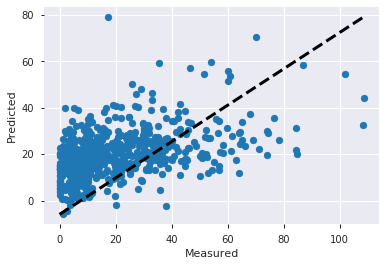

Ridge_Regression
Variance score R²: 0.177
Max Error: 79.20
Mean Absolute Error ± STD: 12.65 ± 16.90
Mean Squared Error: 285.69
Root Mean Squared Error: 16.90



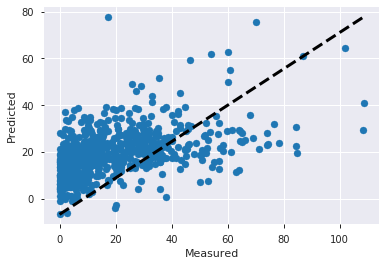

Lasso
Variance score R²: 0.193
Max Error: 79.88
Mean Absolute Error ± STD: 12.56 ± 16.73
Mean Squared Error: 280.02
Root Mean Squared Error: 16.73



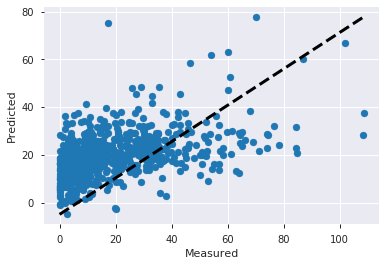

ElasticNet
Variance score R²: 0.203
Max Error: 83.84
Mean Absolute Error ± STD: 12.58 ± 16.63
Mean Squared Error: 276.55
Root Mean Squared Error: 16.63



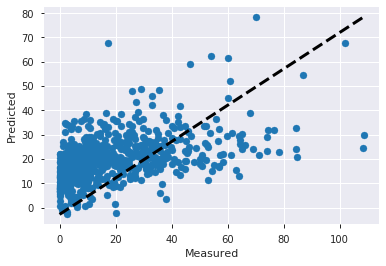

LARS
Variance score R²: 0.050
Max Error: 87.72
Mean Absolute Error ± STD: 14.12 ± 18.16
Mean Squared Error: 329.68
Root Mean Squared Error: 18.16



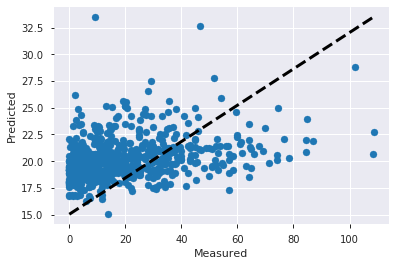

Lasso_LARS
Variance score R²: 0.198
Max Error: 84.02
Mean Absolute Error ± STD: 12.64 ± 16.68
Mean Squared Error: 278.19
Root Mean Squared Error: 16.68



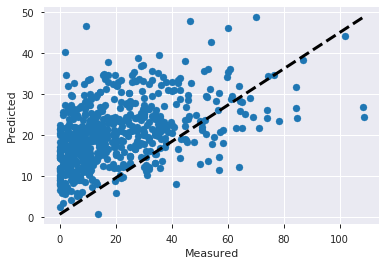

Orthogonal_Matching_Pursuit
Variance score R²: 0.212
Max Error: 86.74
Mean Absolute Error ± STD: 12.43 ± 16.54
Mean Squared Error: 273.41
Root Mean Squared Error: 16.54



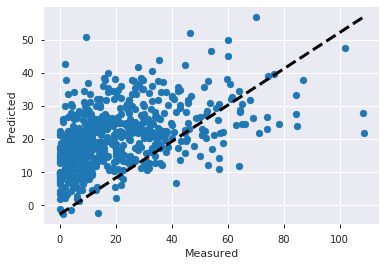

Bayesian_Ridge
Variance score R²: 0.197
Max Error: 87.50
Mean Absolute Error ± STD: 12.52 ± 16.69
Mean Squared Error: 278.64
Root Mean Squared Error: 16.69



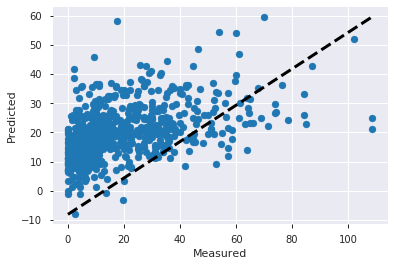

Bayesian_ARD_Regression
Variance score R²: 0.197
Max Error: 87.50
Mean Absolute Error ± STD: 12.52 ± 16.69
Mean Squared Error: 278.64
Root Mean Squared Error: 16.69



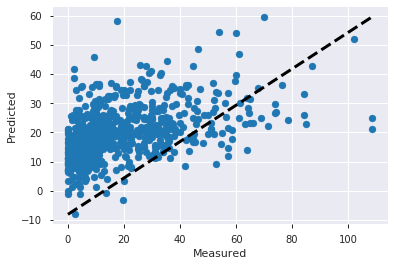

Passive_Aggressive_Regressor
Variance score R²: -0.104
Max Error: 94.67
Mean Absolute Error ± STD: 14.87 ± 19.58
Mean Squared Error: 383.23
Root Mean Squared Error: 19.58



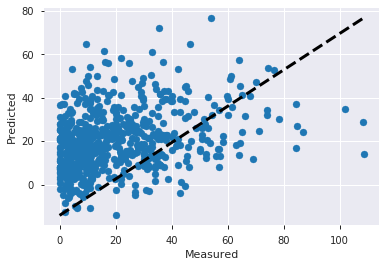

RANSAC_Regressor
Variance score R²: -3.143
Max Error: 457.82
Mean Absolute Error ± STD: 23.78 ± 37.53
Mean Squared Error: 1437.76
Root Mean Squared Error: 37.92



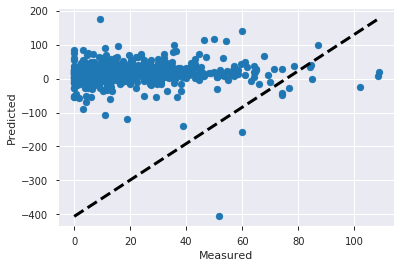

Theil_Sen_Regressor
Variance score R²: 0.082
Max Error: 95.60
Mean Absolute Error ± STD: 13.28 ± 17.83
Mean Squared Error: 318.61
Root Mean Squared Error: 17.85



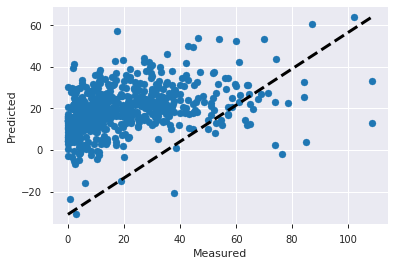

Huber_Regressor
Variance score R²: 0.147
Max Error: 90.44
Mean Absolute Error ± STD: 12.04 ± 16.75
Mean Squared Error: 295.99
Root Mean Squared Error: 17.20



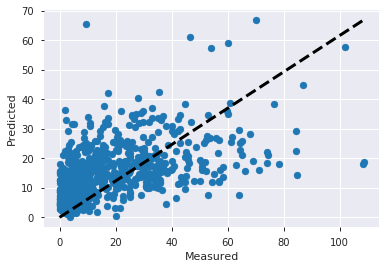

Kernel_Rigde_Regressor
Variance score R²: 0.181
Max Error: 79.22
Mean Absolute Error ± STD: 12.62 ± 16.85
Mean Squared Error: 284.10
Root Mean Squared Error: 16.86



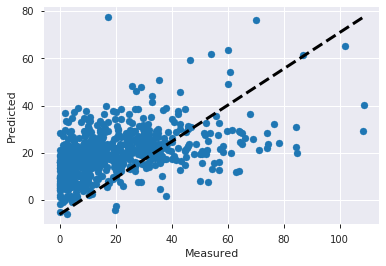

Linear_SVR
Variance score R²: 0.117
Max Error: 78.43
Mean Absolute Error ± STD: 13.96 ± 17.06
Mean Squared Error: 306.41
Root Mean Squared Error: 17.50



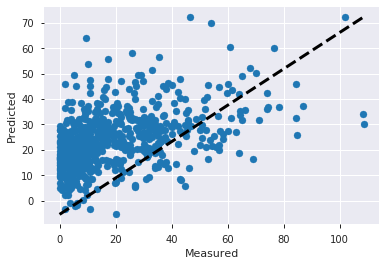

Epsilon_SVR
Variance score R²: -0.104
Max Error: 94.41
Mean Absolute Error ± STD: 13.90 ± 18.68
Mean Squared Error: 383.25
Root Mean Squared Error: 19.58



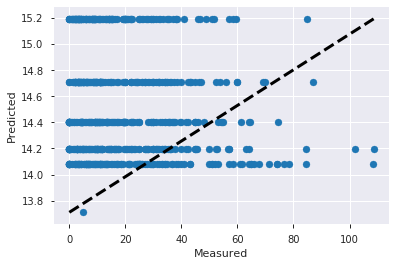

Nu_SVR
Variance score R²: -0.018
Max Error: 90.57
Mean Absolute Error ± STD: 14.19 ± 18.67
Mean Squared Error: 353.16
Root Mean Squared Error: 18.79



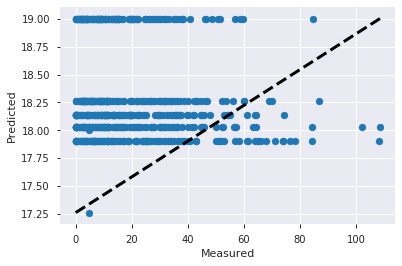

K-neighbors_Regressor
Variance score R²: 0.071
Max Error: 97.64
Mean Absolute Error ± STD: 13.33 ± 17.94
Mean Squared Error: 322.30
Root Mean Squared Error: 17.95



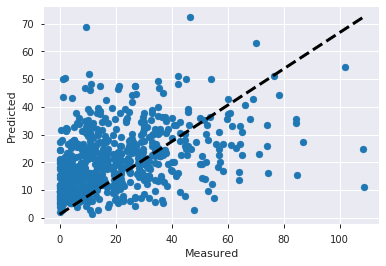

K-neighbors_Radius_Neighbor_Regressor
Variance score R²: 0.111
Max Error: 89.76
Mean Absolute Error ± STD: 13.59 ± 17.56
Mean Squared Error: 308.61
Root Mean Squared Error: 17.57



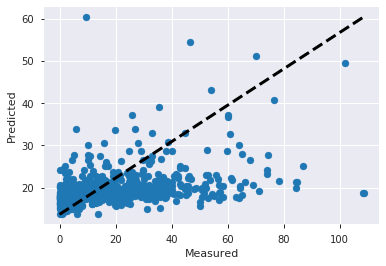

Gaussian_Process_Regressor
Variance score R²: 0.204
Max Error: 82.88
Mean Absolute Error ± STD: 12.58 ± 16.62
Mean Squared Error: 276.21
Root Mean Squared Error: 16.62



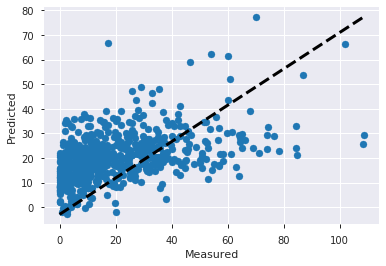

Decision_Tree_Regressor
Variance score R²: -0.513
Max Error: 103.60
Mean Absolute Error ± STD: 16.88 ± 22.91
Mean Squared Error: 525.06
Root Mean Squared Error: 22.91



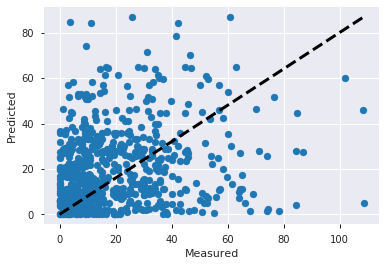

GradientBoostingRegressor
Variance score R²: 0.180
Max Error: 85.81
Mean Absolute Error ± STD: 12.52 ± 16.87
Mean Squared Error: 284.62
Root Mean Squared Error: 16.87



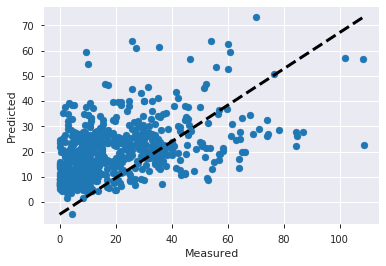

Bagging_Regressor
Variance score R²: 0.165
Max Error: 78.98
Mean Absolute Error ± STD: 12.78 ± 17.00
Mean Squared Error: 289.67
Root Mean Squared Error: 17.02



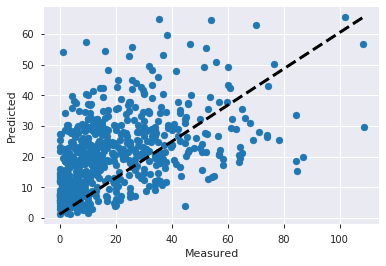

Random_Forest_Regressor
Variance score R²: 0.186
Max Error: 81.85
Mean Absolute Error ± STD: 12.63 ± 16.80
Mean Squared Error: 282.50
Root Mean Squared Error: 16.81



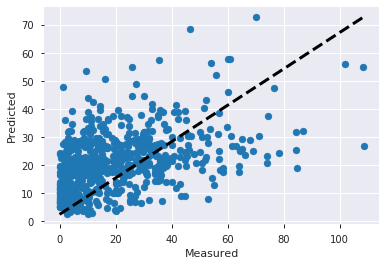

ExtraTree_Regressor
Variance score R²: -0.469
Max Error: 99.90
Mean Absolute Error ± STD: 15.95 ± 22.58
Mean Squared Error: 509.76
Root Mean Squared Error: 22.58



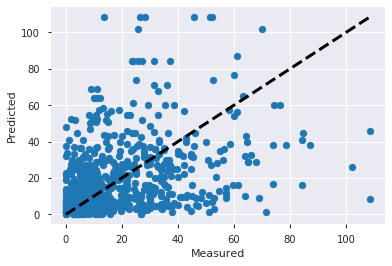

AdaBoost_Regressor
Variance score R²: 0.068
Max Error: 86.72
Mean Absolute Error ± STD: 14.62 ± 17.09
Mean Squared Error: 323.32
Root Mean Squared Error: 17.98



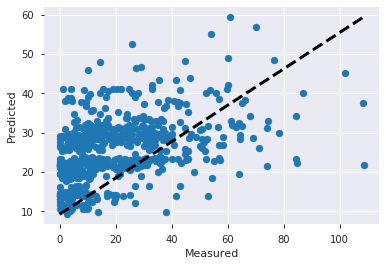

MLP_Regressor
Variance score R²: -2.706
Max Error: 273.02
Mean Absolute Error ± STD: 23.75 ± 35.86
Mean Squared Error: 1286.03
Root Mean Squared Error: 35.86



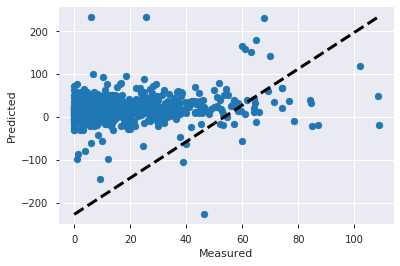

XGBoost_Regressor
Variance score R²: 0.206
Max Error: 66.06
Mean Absolute Error ± STD: 12.45 ± 16.60
Mean Squared Error: 275.63
Root Mean Squared Error: 16.60



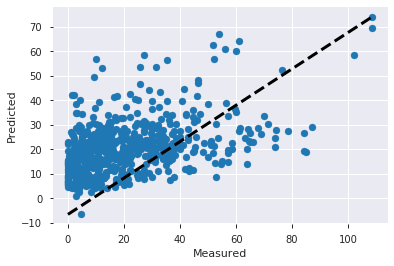

CatBoost_Regressor
Variance score R²: 0.179
Max Error: 82.29
Mean Absolute Error ± STD: 12.59 ± 16.88
Mean Squared Error: 285.04
Root Mean Squared Error: 16.88



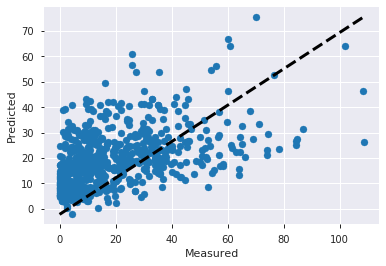

In [56]:
for i in model_list:
    y_pred = cross_val_predict(model_list[i], X_poly, y, cv=5)
    errors = y - y_pred
    #y_pred_inv = (10**(y_pred))-1
    print('\033[1m' + str(i) + '\033[0m')
    print('Variance score R²: %.3f' % r2_score(y, y_pred))
    print('Max Error: %.2f' % max_error(y, y_pred))
    print('Mean Absolute Error ± STD: %.2f ± %.2f' % (mean_absolute_error(y, y_pred), np.std(errors)))
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_pred))
    print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(y, y_pred)))
    print('')
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred)
    ax.plot([y.min(), y.max()], [y_pred.min(), y_pred.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()


In [57]:
model_list = {"Linear_Regression": linear_model.LinearRegression(),
              "Ridge_Regression": linear_model.Ridge(alpha = 0.5),
              "Lasso": linear_model.Lasso(alpha=0.1),
              "ElasticNet": linear_model.ElasticNet(random_state=42),
              "LARS": linear_model.Lars(n_nonzero_coefs=1),
              "Lasso_LARS": linear_model.LassoLars(alpha=0.01, max_iter=5),
              "Orthogonal_Matching_Pursuit": linear_model.OrthogonalMatchingPursuit(),
              "Bayesian_Ridge": linear_model.ARDRegression(),
              "Bayesian_ARD_Regression": linear_model.ARDRegression(),
              "Passive_Aggressive_Regressor": linear_model.PassiveAggressiveRegressor(),
              "RANSAC_Regressor": linear_model.RANSACRegressor(),
              "Theil_Sen_Regressor": linear_model.TheilSenRegressor(random_state=42),
              "Huber_Regressor": linear_model.HuberRegressor(),
              #"Linear_Discriminant_Analysis": discriminant_analysis.LinearDiscriminantAnalysis(),
              "Kernel_Rigde_Regressor": kernel_ridge.KernelRidge(alpha=1.0),
              "Linear_SVR": svm.LinearSVR(random_state=42),
              "Epsilon_SVR": svm.SVR(kernel='poly', gamma='auto', C=1.0, epsilon=0.2),
              "Nu_SVR": svm.NuSVR(gamma='auto'),
              "SGD_Regression": linear_model.SGDRegressor(),
              "K-neighbors_Regressor": neighbors.KNeighborsRegressor(n_neighbors=5),
              "K-neighbors_Radius_Neighbor_Regressor": neighbors.RadiusNeighborsRegressor(radius=28.0),
              "Gaussian_Process_Regressor": gaussian_process.GaussianProcessRegressor(kernel=kernel,random_state=42),
              "PLS_Regressor": cross_decomposition.PLSRegression(n_components=5),
              "Decision_Tree_Regressor": tree.DecisionTreeRegressor(random_state=42),
              "GradientBoostingRegressor": ensemble.GradientBoostingRegressor(random_state=42),
              #"HistGradientBoostingRegressor": ensemble.HistGradientBoostingRegressor(),
              "Bagging_Regressor": ensemble.BaggingRegressor(),
              "Random_Forest_Regressor": ensemble.RandomForestRegressor(random_state=42, n_estimators=100),
              "ExtraTree_Regressor": tree.ExtraTreeRegressor(random_state=42),
              "AdaBoost_Regressor": ensemble.AdaBoostRegressor(random_state=42, n_estimators=100),
              "MLP_Regressor": neural_network.MLPRegressor(hidden_layer_sizes=(32,),max_iter=1000, early_stopping=True),
              #"Isotonic_Regressor": isotonic.IsotonicRegression()
              "XGBoost_Regressor": xgboost.XGBRegressor(objective='reg:squarederror'),
              "CatBoost_Regressor": catboost.CatBoostRegressor(verbose=False)
             }

## Results 3: Standard Scaler preprocessing

Linear_Regression
Variance score R²: 0.204
Max Error: 85.64
Mean Absolute Error ± STD: 12.55 ± 16.62
Root Mean Squared Error: 16.62



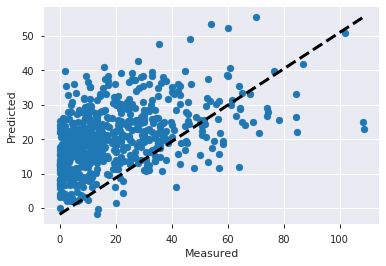

Ridge_Regression
Variance score R²: 0.204
Max Error: 85.40
Mean Absolute Error ± STD: 12.55 ± 16.62
Root Mean Squared Error: 16.62



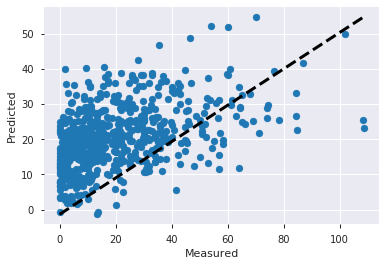

Lasso
Variance score R²: 0.178
Max Error: 82.49
Mean Absolute Error ± STD: 12.87 ± 16.88
Root Mean Squared Error: 16.88



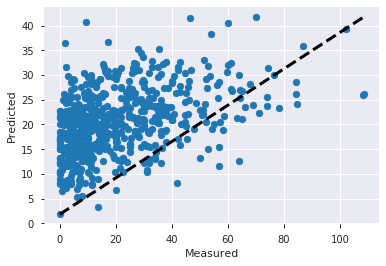

ElasticNet
Variance score R²: -0.010
Max Error: 89.01
Mean Absolute Error ± STD: 14.58 ± 18.72
Root Mean Squared Error: 18.72



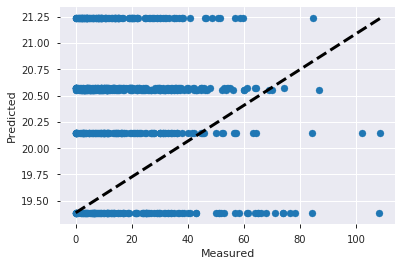

LARS
Variance score R²: 0.056
Max Error: 87.71
Mean Absolute Error ± STD: 14.04 ± 18.10
Root Mean Squared Error: 18.10



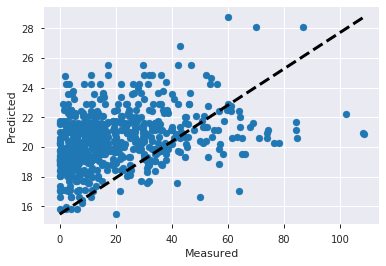

Lasso_LARS
Variance score R²: 0.122
Max Error: 85.91
Mean Absolute Error ± STD: 13.44 ± 17.46
Root Mean Squared Error: 17.46



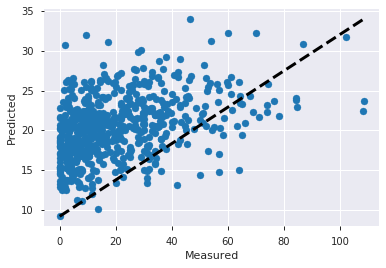

Orthogonal_Matching_Pursuit
Variance score R²: 0.158
Max Error: 82.17
Mean Absolute Error ± STD: 12.90 ± 17.09
Root Mean Squared Error: 17.09



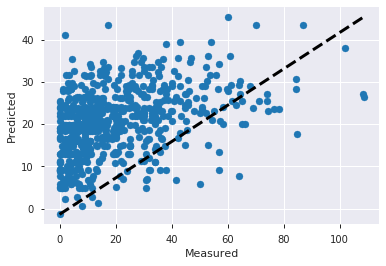

Bayesian_Ridge
Variance score R²: 0.198
Max Error: 84.18
Mean Absolute Error ± STD: 12.59 ± 16.69
Root Mean Squared Error: 16.69



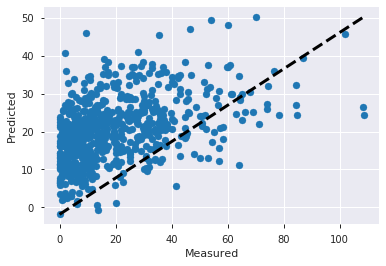

Bayesian_ARD_Regression
Variance score R²: 0.198
Max Error: 84.18
Mean Absolute Error ± STD: 12.59 ± 16.69
Root Mean Squared Error: 16.69



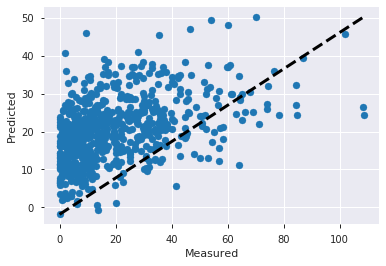

Passive_Aggressive_Regressor
Variance score R²: -0.625
Max Error: 119.24
Mean Absolute Error ± STD: 18.41 ± 23.73
Root Mean Squared Error: 23.74



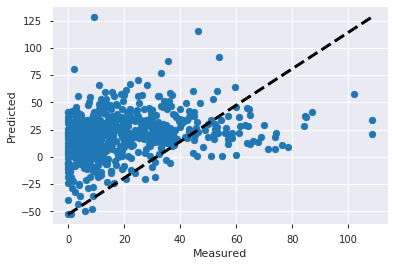

RANSAC_Regressor
Variance score R²: -0.174
Max Error: 99.92
Mean Absolute Error ± STD: 13.98 ± 19.23
Root Mean Squared Error: 20.18



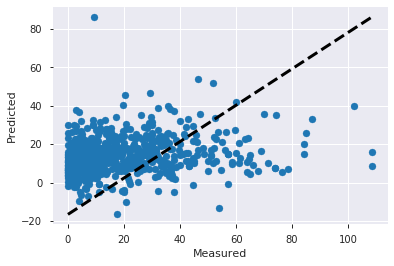

Theil_Sen_Regressor
Variance score R²: 0.189
Max Error: 89.80
Mean Absolute Error ± STD: 12.41 ± 16.73
Root Mean Squared Error: 16.77



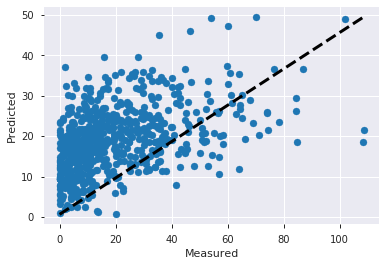

Huber_Regressor
Variance score R²: 0.177
Max Error: 91.59
Mean Absolute Error ± STD: 12.15 ± 16.68
Root Mean Squared Error: 16.90



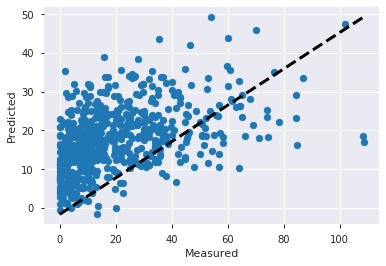

Kernel_Rigde_Regressor
Variance score R²: 0.213
Max Error: 84.91
Mean Absolute Error ± STD: 12.49 ± 16.53
Root Mean Squared Error: 16.53



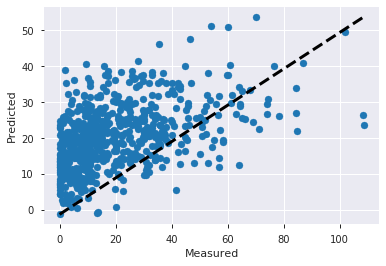

Linear_SVR
Variance score R²: 0.161
Max Error: 92.80
Mean Absolute Error ± STD: 12.10 ± 16.66
Root Mean Squared Error: 17.06



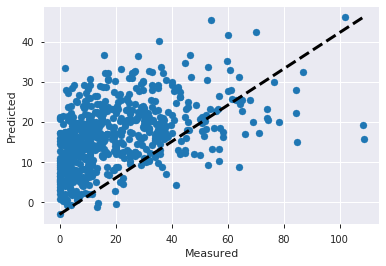

Epsilon_SVR
Variance score R²: 0.046
Max Error: 130.42
Mean Absolute Error ± STD: 12.78 ± 17.92
Root Mean Squared Error: 18.19



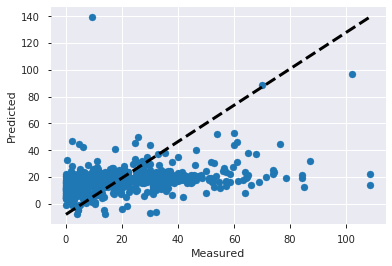

Nu_SVR
Variance score R²: 0.187
Max Error: 88.55
Mean Absolute Error ± STD: 12.49 ± 16.74
Root Mean Squared Error: 16.79



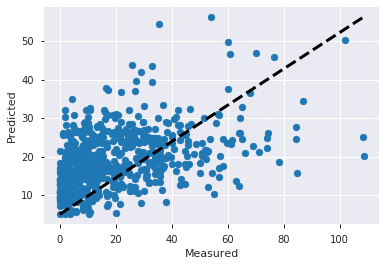

SGD_Regression
Variance score R²: 0.198
Max Error: 85.16
Mean Absolute Error ± STD: 12.61 ± 16.68
Root Mean Squared Error: 16.68



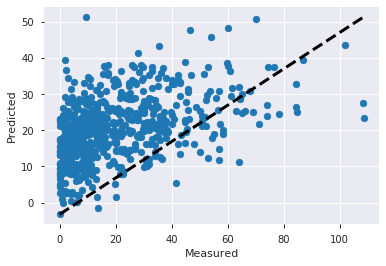

K-neighbors_Regressor
Variance score R²: 0.117
Max Error: 87.54
Mean Absolute Error ± STD: 12.86 ± 17.51
Root Mean Squared Error: 17.51



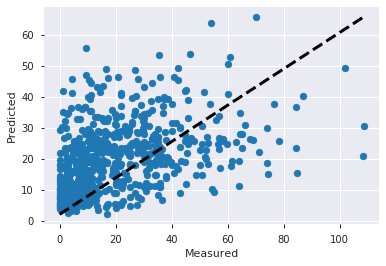

K-neighbors_Radius_Neighbor_Regressor
Variance score R²: -0.010
Max Error: 89.01
Mean Absolute Error ± STD: 14.58 ± 18.72
Root Mean Squared Error: 18.72



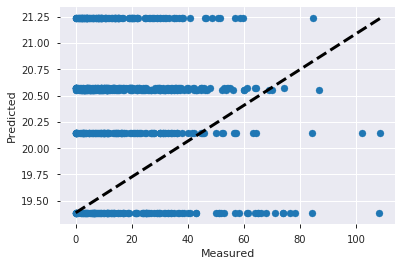

Gaussian_Process_Regressor
Variance score R²: 0.211
Max Error: 84.99
Mean Absolute Error ± STD: 12.50 ± 16.54
Root Mean Squared Error: 16.54



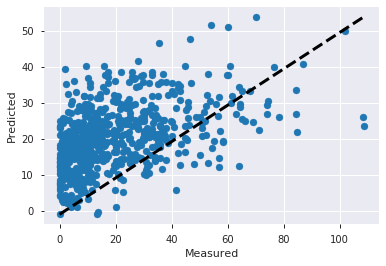

PLS_Regressor
Variance score R²: 0.197
Max Error: 83.98
Mean Absolute Error ± STD: 12.62 ± 16.69
Root Mean Squared Error: 16.69



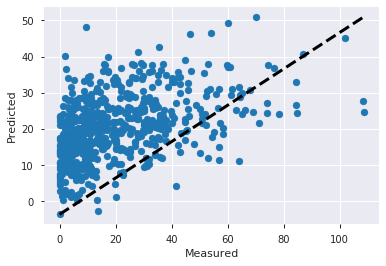

Decision_Tree_Regressor
Variance score R²: -0.409
Max Error: 91.20
Mean Absolute Error ± STD: 16.39 ± 22.11
Root Mean Squared Error: 22.11



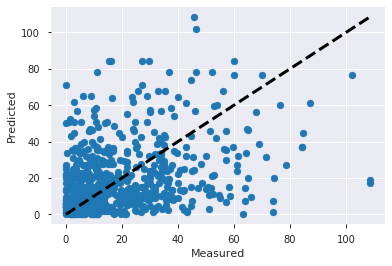

GradientBoostingRegressor
Variance score R²: 0.172
Max Error: 67.89
Mean Absolute Error ± STD: 12.75 ± 16.96
Root Mean Squared Error: 16.96



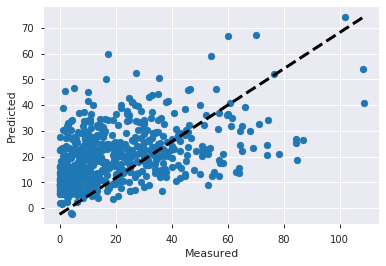

Bagging_Regressor
Variance score R²: 0.136
Max Error: 90.29
Mean Absolute Error ± STD: 13.08 ± 17.28
Root Mean Squared Error: 17.31



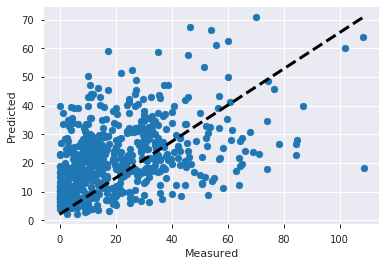

Random_Forest_Regressor
Variance score R²: 0.170
Max Error: 84.37
Mean Absolute Error ± STD: 12.73 ± 16.94
Root Mean Squared Error: 16.97



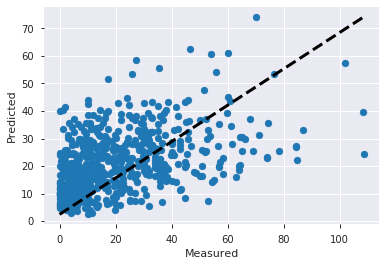

ExtraTree_Regressor
Variance score R²: -0.518
Max Error: 83.10
Mean Absolute Error ± STD: 17.14 ± 22.95
Root Mean Squared Error: 22.95



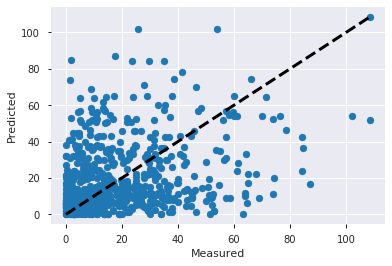

AdaBoost_Regressor
Variance score R²: -0.006
Max Error: 79.88
Mean Absolute Error ± STD: 15.58 ± 17.06
Root Mean Squared Error: 18.69



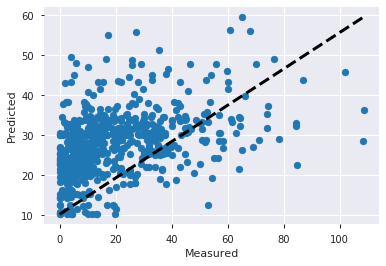

MLP_Regressor
Variance score R²: 0.192
Max Error: 81.58
Mean Absolute Error ± STD: 12.77 ± 16.74
Root Mean Squared Error: 16.75



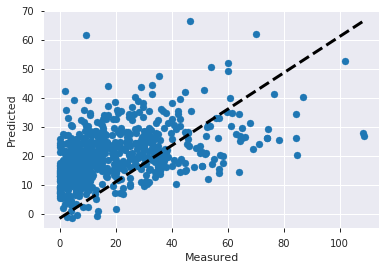

XGBoost_Regressor
Variance score R²: 0.158
Max Error: 88.50
Mean Absolute Error ± STD: 12.71 ± 17.09
Root Mean Squared Error: 17.09



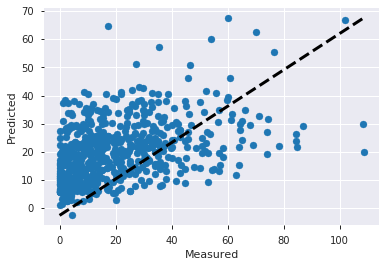

CatBoost_Regressor
Variance score R²: 0.123
Max Error: 82.05
Mean Absolute Error ± STD: 12.93 ± 17.44
Root Mean Squared Error: 17.44



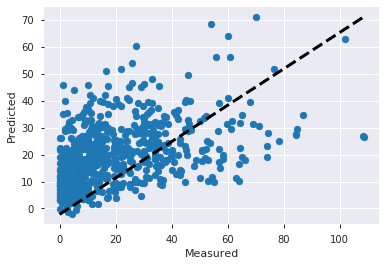

In [58]:
for i in model_list:
    y_pred = cross_val_predict(model_list[i], X_std_sc, y_std_sc, cv=5)
    #y_pred_inv = (10**(y_pred))-1
    y_pred_reshaped = np.reshape(y_pred, (y_pred.shape[0], 1))
    y_pred_inv = sc_std_y.inverse_transform(y_pred_reshaped)
    y_pred_inv_reshaped = np.reshape(y_pred_inv, (y_pred_inv.shape[0],))
    errors = y - y_pred_inv_reshaped
    print('\033[1m' + str(i) + '\033[0m')
    print('Variance score R²: %.3f' % r2_score(y, y_pred_inv_reshaped))
    print('Max Error: %.2f' % max_error(y, y_pred_inv_reshaped))
    print('Mean Absolute Error ± STD: %.2f ± %.2f' % (mean_absolute_error(y, y_pred_inv_reshaped), np.std(errors)))
    print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(y, y_pred_inv_reshaped)))
    print('')
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred_inv_reshaped)
    ax.plot([y.min(), y.max()], [y_pred_inv_reshaped.min(), y_pred_inv_reshaped.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()


## Results 4: MinMax Scaler preprocessing

Linear_Regression
Variance score R²: 0.202
Max Error: 84.00
Mean Absolute Error ± STD: 12.57 ± 16.64
Mean Squared Error: 276.87
Root Mean Squared Error: 16.64



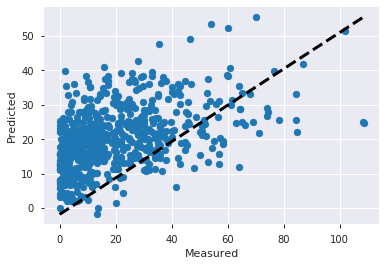

Ridge_Regression
Variance score R²: 0.200
Max Error: 84.69
Mean Absolute Error ± STD: 12.59 ± 16.66
Mean Squared Error: 277.51
Root Mean Squared Error: 16.66



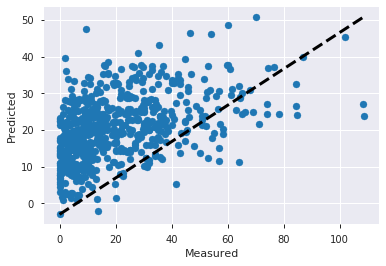

Lasso
Variance score R²: -0.010
Max Error: 89.01
Mean Absolute Error ± STD: 14.58 ± 18.72
Mean Squared Error: 350.31
Root Mean Squared Error: 18.72



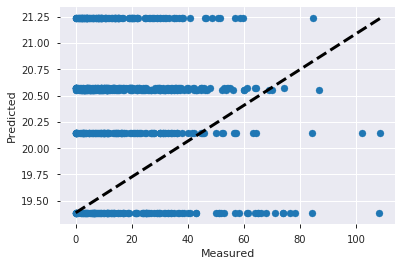

ElasticNet
Variance score R²: -0.010
Max Error: 89.01
Mean Absolute Error ± STD: 14.58 ± 18.72
Mean Squared Error: 350.31
Root Mean Squared Error: 18.72



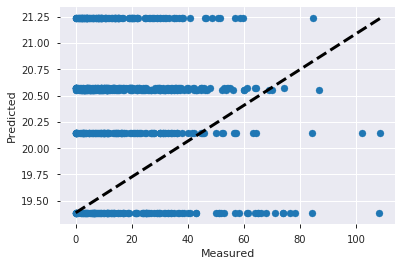

LARS
Variance score R²: 0.056
Max Error: 87.71
Mean Absolute Error ± STD: 14.04 ± 18.10
Mean Squared Error: 327.46
Root Mean Squared Error: 18.10



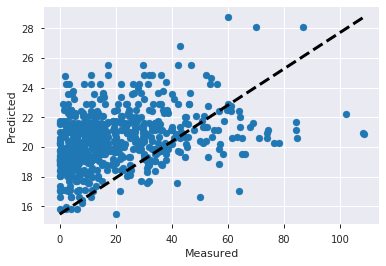

Lasso_LARS
Variance score R²: -0.010
Max Error: 89.01
Mean Absolute Error ± STD: 14.58 ± 18.72
Mean Squared Error: 350.31
Root Mean Squared Error: 18.72



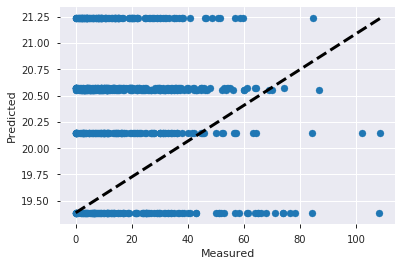

Orthogonal_Matching_Pursuit
Variance score R²: 0.158
Max Error: 82.17
Mean Absolute Error ± STD: 12.90 ± 17.09
Mean Squared Error: 292.07
Root Mean Squared Error: 17.09



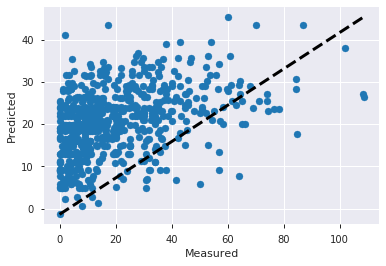

Bayesian_Ridge
Variance score R²: 0.197
Max Error: 84.18
Mean Absolute Error ± STD: 12.59 ± 16.69
Mean Squared Error: 278.50
Root Mean Squared Error: 16.69



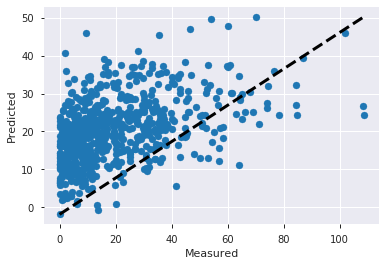

Bayesian_ARD_Regression
Variance score R²: 0.197
Max Error: 84.18
Mean Absolute Error ± STD: 12.59 ± 16.69
Mean Squared Error: 278.50
Root Mean Squared Error: 16.69



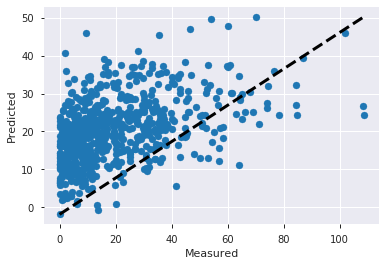

Passive_Aggressive_Regressor
Variance score R²: -0.193
Max Error: 86.79
Mean Absolute Error ± STD: 16.10 ± 19.96
Mean Squared Error: 414.10
Root Mean Squared Error: 20.35



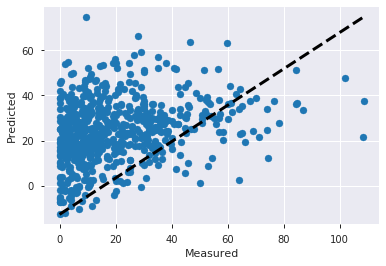

RANSAC_Regressor
Variance score R²: -0.253
Max Error: 119.63
Mean Absolute Error ± STD: 14.93 ± 20.42
Mean Squared Error: 434.65
Root Mean Squared Error: 20.85



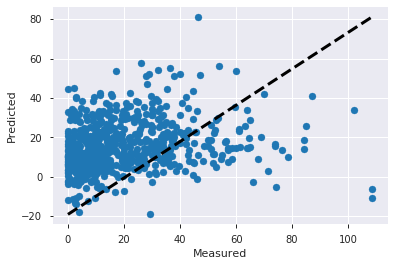

Theil_Sen_Regressor
Variance score R²: 0.187
Max Error: 90.61
Mean Absolute Error ± STD: 12.37 ± 16.74
Mean Squared Error: 282.05
Root Mean Squared Error: 16.79



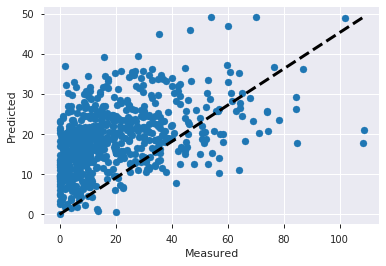

Huber_Regressor
Variance score R²: 0.177
Max Error: 91.59
Mean Absolute Error ± STD: 12.15 ± 16.68
Mean Squared Error: 285.46
Root Mean Squared Error: 16.90



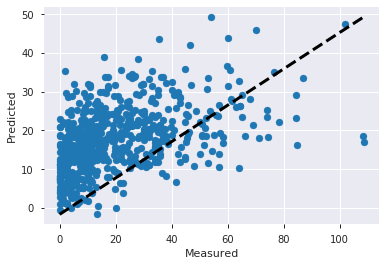

Kernel_Rigde_Regressor
Variance score R²: 0.200
Max Error: 84.90
Mean Absolute Error ± STD: 12.59 ± 16.66
Mean Squared Error: 277.44
Root Mean Squared Error: 16.66



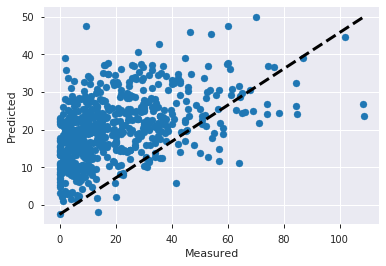

Linear_SVR
Variance score R²: 0.151
Max Error: 91.56
Mean Absolute Error ± STD: 12.13 ± 16.74
Mean Squared Error: 294.64
Root Mean Squared Error: 17.16



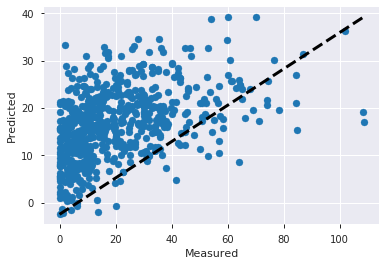

Epsilon_SVR
Variance score R²: 0.063
Max Error: 85.17
Mean Absolute Error ± STD: 14.94 ± 17.29
Mean Squared Error: 325.15
Root Mean Squared Error: 18.03



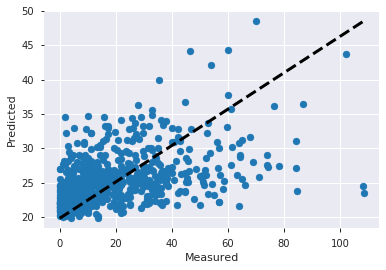

Nu_SVR
Variance score R²: 0.196
Max Error: 92.85
Mean Absolute Error ± STD: 12.22 ± 16.63
Mean Squared Error: 279.03
Root Mean Squared Error: 16.70



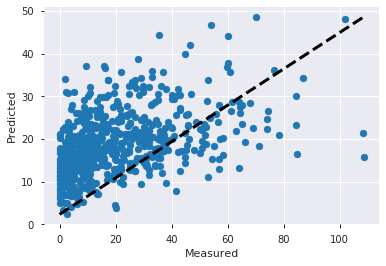

SGD_Regression
Variance score R²: 0.119
Max Error: 90.93
Mean Absolute Error ± STD: 13.35 ± 17.48
Mean Squared Error: 305.63
Root Mean Squared Error: 17.48



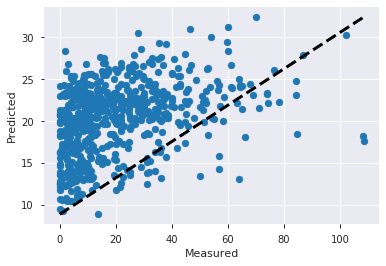

K-neighbors_Regressor
Variance score R²: 0.115
Max Error: 87.54
Mean Absolute Error ± STD: 13.05 ± 17.52
Mean Squared Error: 307.00
Root Mean Squared Error: 17.52



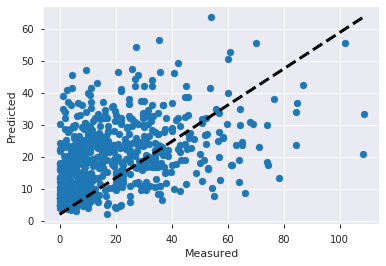

K-neighbors_Radius_Neighbor_Regressor
Variance score R²: -0.010
Max Error: 89.01
Mean Absolute Error ± STD: 14.58 ± 18.72
Mean Squared Error: 350.31
Root Mean Squared Error: 18.72



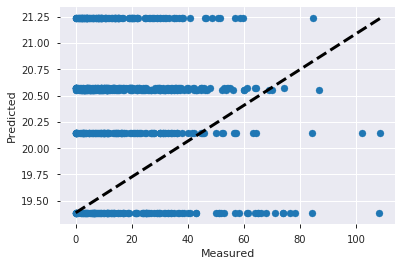

Gaussian_Process_Regressor
Variance score R²: 0.204
Max Error: 85.22
Mean Absolute Error ± STD: 12.56 ± 16.62
Mean Squared Error: 276.26
Root Mean Squared Error: 16.62



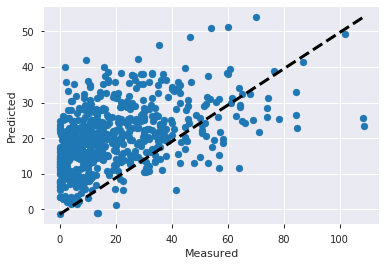

PLS_Regressor
Variance score R²: 0.197
Max Error: 83.98
Mean Absolute Error ± STD: 12.62 ± 16.69
Mean Squared Error: 278.65
Root Mean Squared Error: 16.69



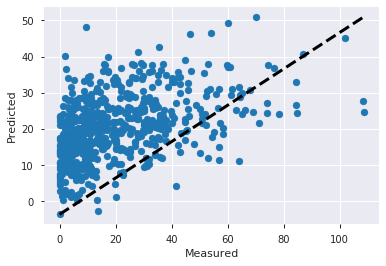

Decision_Tree_Regressor
Variance score R²: -0.427
Max Error: 106.20
Mean Absolute Error ± STD: 16.58 ± 22.26
Mean Squared Error: 495.35
Root Mean Squared Error: 22.26



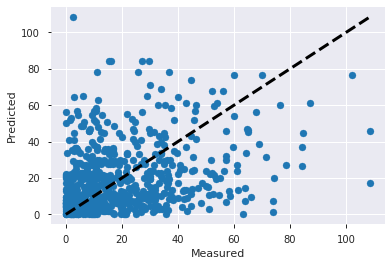

GradientBoostingRegressor
Variance score R²: 0.168
Max Error: 73.85
Mean Absolute Error ± STD: 12.76 ± 16.99
Mean Squared Error: 288.78
Root Mean Squared Error: 16.99



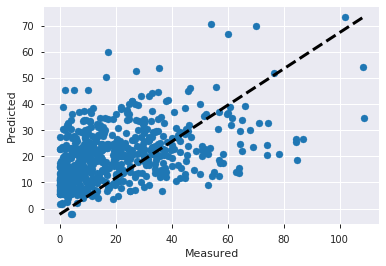

Bagging_Regressor
Variance score R²: 0.082
Max Error: 81.37
Mean Absolute Error ± STD: 13.45 ± 17.83
Mean Squared Error: 318.42
Root Mean Squared Error: 17.84



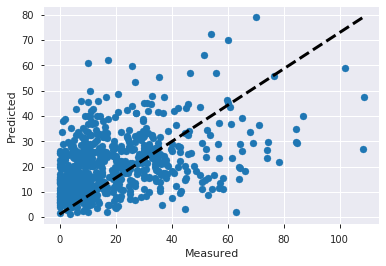

Random_Forest_Regressor
Variance score R²: 0.163
Max Error: 89.69
Mean Absolute Error ± STD: 12.74 ± 17.02
Mean Squared Error: 290.52
Root Mean Squared Error: 17.04



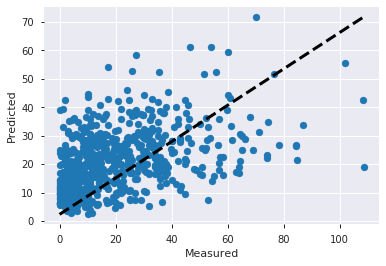

ExtraTree_Regressor
Variance score R²: -0.545
Max Error: 86.50
Mean Absolute Error ± STD: 17.39 ± 23.14
Mean Squared Error: 535.97
Root Mean Squared Error: 23.15



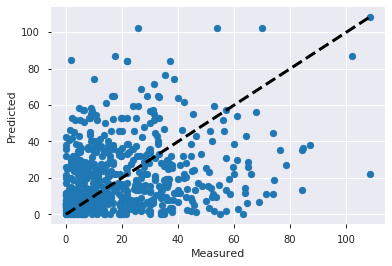

AdaBoost_Regressor
Variance score R²: 0.035
Max Error: 86.36
Mean Absolute Error ± STD: 15.05 ± 17.05
Mean Squared Error: 335.01
Root Mean Squared Error: 18.30



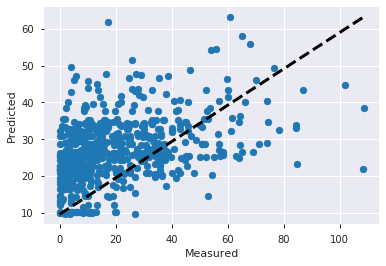

MLP_Regressor
Variance score R²: -0.050
Max Error: 101.22
Mean Absolute Error ± STD: 13.76 ± 19.04
Mean Squared Error: 364.44
Root Mean Squared Error: 19.09



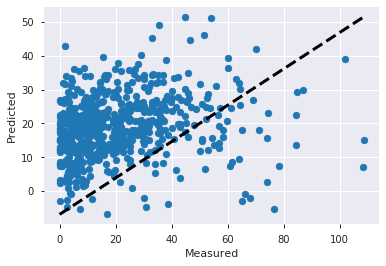

XGBoost_Regressor
Variance score R²: 0.170
Max Error: 89.82
Mean Absolute Error ± STD: 12.61 ± 16.97
Mean Squared Error: 288.03
Root Mean Squared Error: 16.97



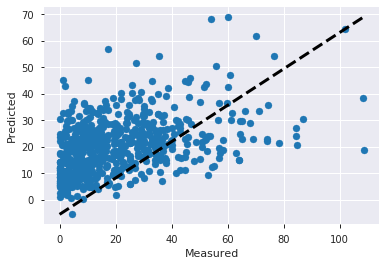

CatBoost_Regressor
Variance score R²: 0.121
Max Error: 82.05
Mean Absolute Error ± STD: 12.93 ± 17.46
Mean Squared Error: 304.93
Root Mean Squared Error: 17.46



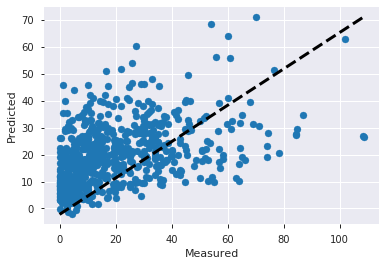

In [59]:
for i in model_list:
    y_pred = cross_val_predict(model_list[i], X_sc, y_sc, cv=5)
    #y_pred_inv = (10**(y_pred))-1
    y_pred_reshaped = np.reshape(y_pred, (y_pred.shape[0], 1))
    y_pred_inv = sc_y.inverse_transform(y_pred_reshaped)
    y_pred_inv_reshaped = np.reshape(y_pred_inv, (y_pred_inv.shape[0],))
    errors = y - y_pred_inv_reshaped
    print('\033[1m' + str(i) + '\033[0m')
    print('Variance score R²: %.3f' % r2_score(y, y_pred_inv_reshaped))
    print('Max Error: %.2f' % max_error(y, y_pred_inv_reshaped))
    print('Mean Absolute Error ± STD: %.2f ± %.2f' % (mean_absolute_error(y, y_pred_inv_reshaped), np.std(errors)))
    print('Mean Squared Error: %.2f' % mean_squared_error(y, y_pred_inv_reshaped))
    print('Root Mean Squared Error: %.2f' % np.sqrt(mean_squared_error(y, y_pred_inv_reshaped)))
    print('')
    fig, ax = plt.subplots()
    ax.scatter(y, y_pred_inv_reshaped)
    ax.plot([y.min(), y.max()], [y_pred_inv_reshaped.min(), y_pred_inv_reshaped.max()], 'k--', lw=3)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()


In [60]:
'''from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Variance score R²: %.2f' % r2_score(y_test, y_pred))
    print('Max Error: %.2f' % max_error(y_test, y_pred))
    print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error: %.2f' % mean_squared_error(y_test, y_pred))
    print('')
'''

'''X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of both sets.
print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))
'''

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# Print the shapes of both sets.\nprint("X_train: " + str(X_train.shape))\nprint("X_test: " + str(X_test.shape))\nprint("y_train: " + str(y_train.shape))\nprint("y_test: " + str(y_test.shape))\n'